# **Import thư viện**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

/tmp/ipykernel_26/2908000410.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Đọc dữ liệu**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/DATA MINING/Project Midterm Test_Prudential')

In [ ]:
# from zipfile import ZipFile
# import zipfile

# filepath = os.getcwd()
# with zipfile.ZipFile('./prudential-life-insurance-assessment.zip','r') as zip_file:
#     zip_file.extractall(filepath)

In [ ]:
# filepath = os.getcwd()
# with zipfile.ZipFile('./train.csv.zip','r') as zip_file:
#     zip_file.extractall(filepath)

In [ ]:
# filepath = os.getcwd()
# with zipfile.ZipFile('./test.csv.zip','r') as zip_file:
#     zip_file.extractall(filepath)

Trong tập dữ liệu này, ta được cung cấp hơn một trăm biến mô tả các thuộc tính của người đăng ký bảo hiểm nhân thọ. Nhiệm vụ là dự đoán biến "Phản hồi" cho từng Id trong bộ kiểm tra. "Phản hồi" là thước đo rủi ro thứ tự có 8 cấp độ.

In [ ]:
# df_train = pd.read_csv('./train.csv')
df_train = pd.read_csv('/kaggle/input/prudential-life-insurance-assessment/train.csv.zip')
df_train

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8


In [ ]:
df_train.shape

(59381, 128)

In [ ]:
df_train.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

**Thông tin về các thuộc tính trong bảng dữ liệu:**
- Id:	Mã định danh duy nhất gắn liền với một đơn nộp.
- Product_Info_1-7:	Tập hợp các biến chuẩn hóa liên quan đến sản phẩm áp dụng cho
- Ins_Age:	Độ tuổi chuẩn hóa của người nộp đơn
- Ht:	Chiều cao chuẩn hóa của người nộp đơn
- Wt:	Cân nặng chuẩn hóa của người nộp đơn
- BMI:	BMI chuẩn hóa của người nộp đơn
- Employment_Info_1-6:	Tập hợp các biến chuẩn hóa liên quan đến lịch sử việc làm của người nộp đơn.
- InsuredInfo_1-6:	Tập hợp các biến chuẩn hóa cung cấp thông tin về người nộp đơn.
- Insurance_History_1-9:	Tập hợp các biến chuẩn hóa liên quan đến lịch sử bảo hiểm của người nộp đơn.
- Family_Hist_1-5	A: tập hợp các biến chuẩn hóa liên quan đến lịch sử gia đình của người nộp đơn.
- Medical_History_1-41:	Tập hợp các biến chuẩn hóa liên quan đến bệnh sử của người nộp đơn.
- Medical_Keyword_1-48:	Tập hợp các biến giả liên quan đến sự hiện diện/không có của từ khóa y tế được liên kết với đơn nộp.
- Response:	Đây là biến mục tiêu, biến thứ tự liên quan đến quyết định cuối cùng liên quan đến một đơn nộp.

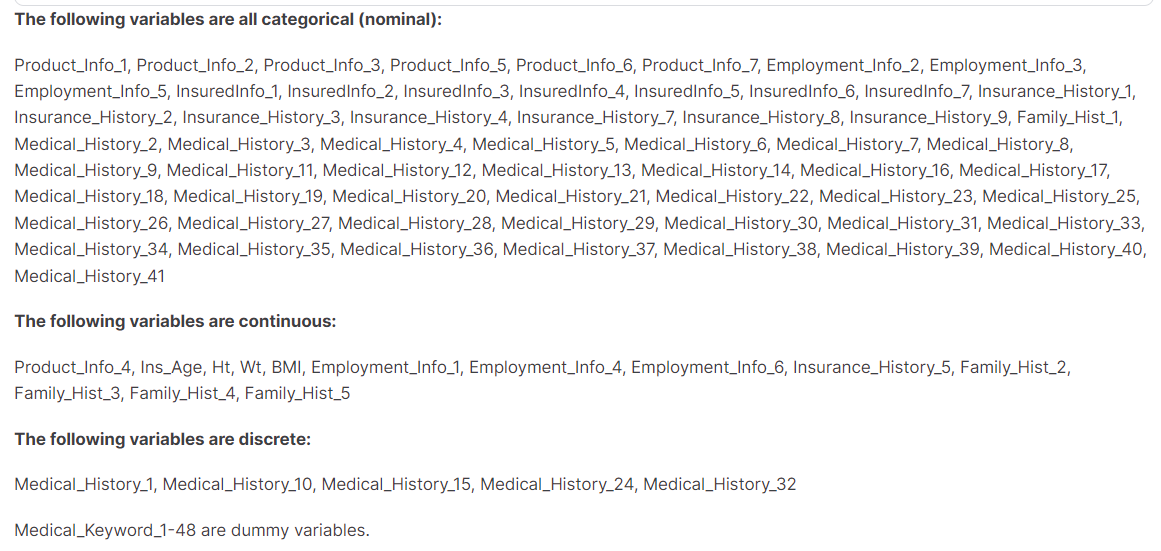

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [ ]:
df_train.dtypes

Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 128, dtype: object

# **Tiền xử lý dữ liệu - Train Dataset**

## **Kiểm tra Missing Value**

In [ ]:
check_nan = df_train.isna().sum()
check_nan[check_nan > 0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

In [ ]:
total_miss = df_train.isna().sum().sort_values(ascending = False)
percent = ((df_train.isna().sum()/df_train.shape[0])*100).sort_values(ascending = False)

total_miss = total_miss[total_miss > 0]
percent = percent[percent > 0]

missing_data = pd.concat([total_miss, percent], axis = 1, keys = ['Total Miss', 'Percent'])
missing_data.reset_index(inplace=True)
missing_data.rename(columns={'index': 'Columns'}, inplace=True)
missing_data

,Columns,Total Miss,Percent
0,Medical_History_10,58824,99.061990
1,Medical_History_32,58274,98.135767
2,Medical_History_24,55580,93.598963
3,Medical_History_15,44596,75.101463
4,Family_Hist_5,41811,70.411411
5,Family_Hist_3,34241,57.663226
6,Family_Hist_2,28656,48.257860
7,Insurance_History_5,25396,42.767889
8,Family_Hist_4,19184,32.306630
9,Employment_Info_6,10854,18.278574


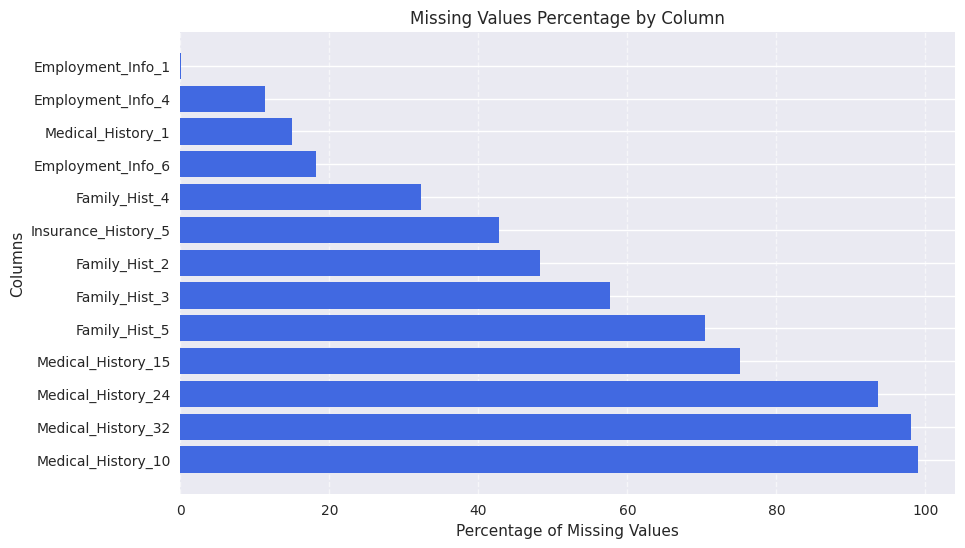

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(missing_data['Columns'], missing_data['Percent'], color='royalblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values Percentage by Column')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Dựa trên biểu đồ tỉ lệ NULL của mỗi cột thuộc tính, ta nhận thấy:
- Đa số các cột đều có tỉ lệ giá trị bị thiếu trên 30%, riêng chỉ có các cột 'Employment_Info_1', 'Employment_Info_6', 'Family_Hist_1' là thấp(dưới 20%)
- Nguyên nhân có thể là do khách hàng này họ chưa từng có lịch sử khám chữa bệnh này hoặc là chưa từng làm công việc đó nên thông tin sẽ bị khuyết.

=> Xử lý:
- Ta sẽ nhặt ra những cột bị NULL trên 30% và drop.
- Những cột NULL ít còn lại thì sẽ fillna bằng mean hoặc là median.


In [ ]:
# Lọc những cột có tỷ lệ Null trên 30%
nacols_above30 = missing_data[missing_data['Percent'] > 30]['Columns']
nacols_above30

0     Medical_History_10
1     Medical_History_32
2     Medical_History_24
3     Medical_History_15
4          Family_Hist_5
5          Family_Hist_3
6          Family_Hist_2
7    Insurance_History_5
8          Family_Hist_4
Name: Columns, dtype: object

In [ ]:
df_train[['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Medical_History_1']].dtypes

Employment_Info_1    float64
Employment_Info_4    float64
Employment_Info_6    float64
Medical_History_1    float64
dtype: object

In [ ]:
df_train[['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Medical_History_1']].describe()

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Medical_History_1
count,59362.000000,52602.000000,48527.000000,50492.000000
mean,0.077582,0.006283,0.361469,7.962172
std,0.082347,0.032816,0.349551,13.027697
min,0.000000,0.000000,0.000000,0.000000
25%,0.035000,0.000000,0.060000,2.000000
50%,0.060000,0.000000,0.250000,4.000000
75%,0.100000,0.000000,0.550000,9.000000
max,1.000000,1.000000,1.000000,240.000000


In [ ]:
df_train = df_train.drop(columns = nacols_above30, axis = 1)
df_train.shape

(59381, 119)

In [ ]:
check_nan = df_train.isna().sum()
check_nan[check_nan > 0]

Employment_Info_1       19
Employment_Info_4     6779
Employment_Info_6    10854
Medical_History_1     8889
dtype: int64

In [ ]:
columns_to_fill = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Medical_History_1']
df_train[columns_to_fill] = df_train[columns_to_fill].fillna(df_train[columns_to_fill].mean())

In [ ]:
check_nan = df_train.isna().sum()
check_nan[check_nan > 0]

Series([], dtype: int64)

## **Kiểm tra dữ liệu Duplicated**

In [ ]:
train_duplicated = df_train.duplicated().sum()
train_duplicated

0

**Dữ liệu không xuất hiện giá trị bị trùng lặp.**



## **Kiểm tra lỗi Logic và Outlier**


In [ ]:
# def find_outliers(df):
#     q1=df.quantile(0.25)
#     q3=df.quantile(0.75)
#     IQR=q3-q1
#     lower= q1 - 1.5*IQR
#     upper = q3 + 1.5*IQR
#     outliers = df[((df < lower) | (df > upper))]
#     return outliers, lower, upper

# outliers1, lower, upper = find_outliers(df_train_new)
# outliers1_perc = (outliers1.count()/df_train.shape[0] * 100 )
# out_cols= outliers1_perc.loc[outliers1_perc.index [outliers1_perc > 0]]
# print (out_cols)
# outlier_ls =list(out_cols.index)
# outlier_ls

In [ ]:
response_counts = df_train['Response'].value_counts()
response_counts

Response
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: count, dtype: int64

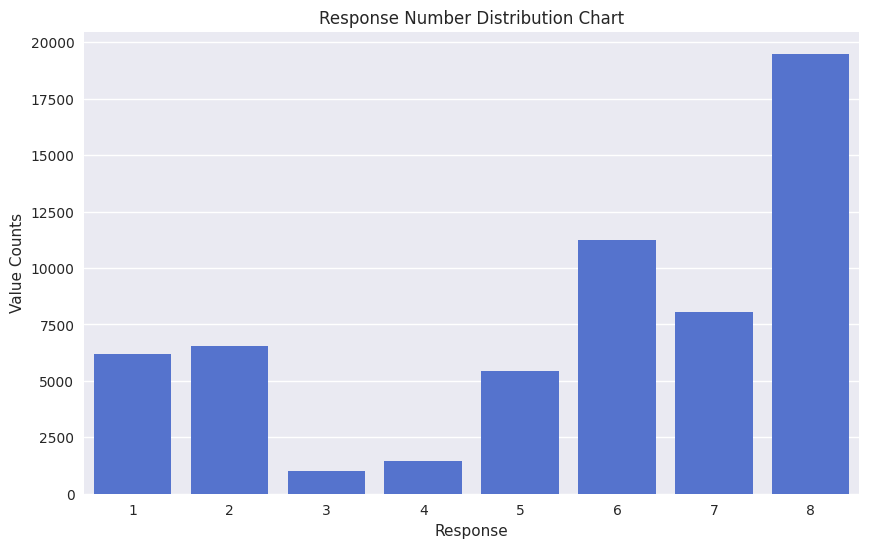

In [ ]:
values = response_counts.values
labels = response_counts.index

plt.figure(figsize=(10, 6))
sns.barplot(x = labels, y = values, color='royalblue')
plt.xlabel('Response')
plt.ylabel('Value Counts')
plt.title('Response Number Distribution Chart')
plt.show()


**Nhận xét:**
- Biến đầu ra gồm có 8 giá trị, response_8 là giá trị mà xuất hiện nhiều nhất
- Mức độ phân bổ của nhãn bị mất cân bằng

=> Xử lý: Dùng resampling để cân bằng lại nhãn.

In [ ]:
categorical_cols =  [col for col in df_train.columns if df_train[col].dtype =='object']
print("Dữ liệu định tính:", categorical_cols)

Dữ liệu định tính: ['Product_Info_2']


In [ ]:
numerical_cols =  [col for col in df_train.columns if df_train[col].dtype !='object']
print("Dữ liệu định lượng:",numerical_cols)

Dữ liệu định lượng: ['Id', 'Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Me

In [ ]:
unique_vals = []
for col in categorical_cols:
    uniq_val = df_train[col].unique()
    unique_vals.append(uniq_val)
unique_vals

[array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
        'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)]

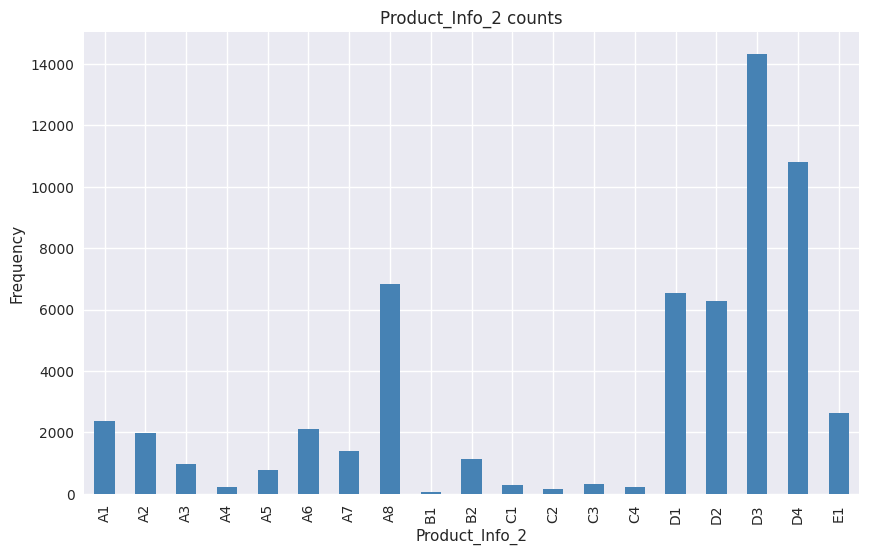

In [ ]:
for col in categorical_cols:
    counts = df_train[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize=(10, 6))
    elif len(counts) >50 :
      continue
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()


- Dữ liệu của các thuộc tính hầu hết đều bị mất cân bằng.

/tmp/ipykernel_26/2089395160.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8, 6))


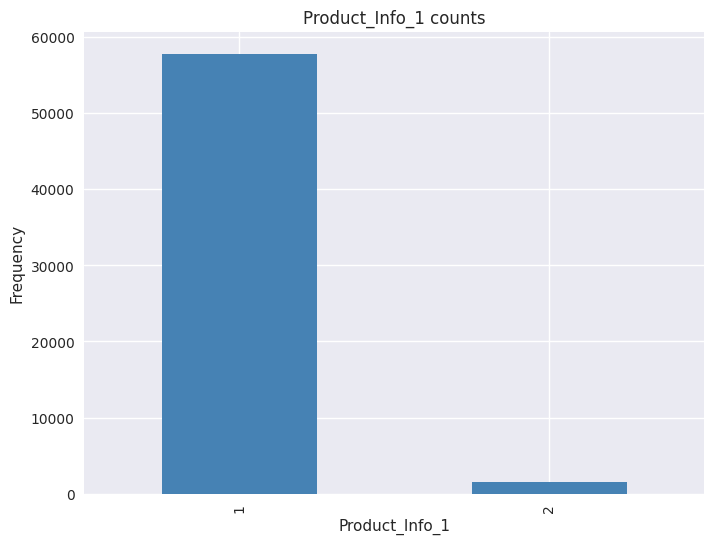

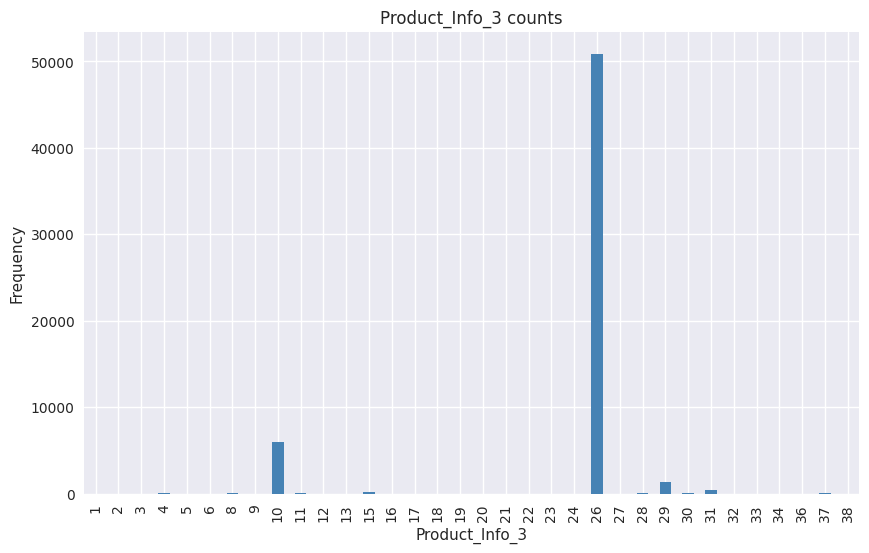

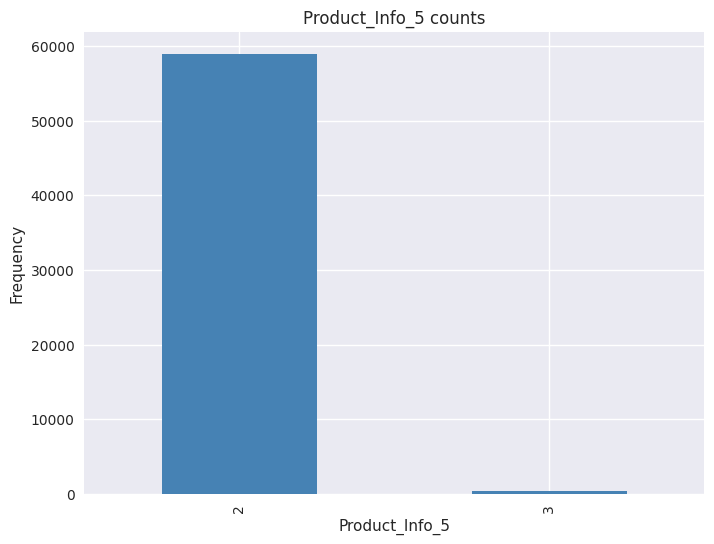

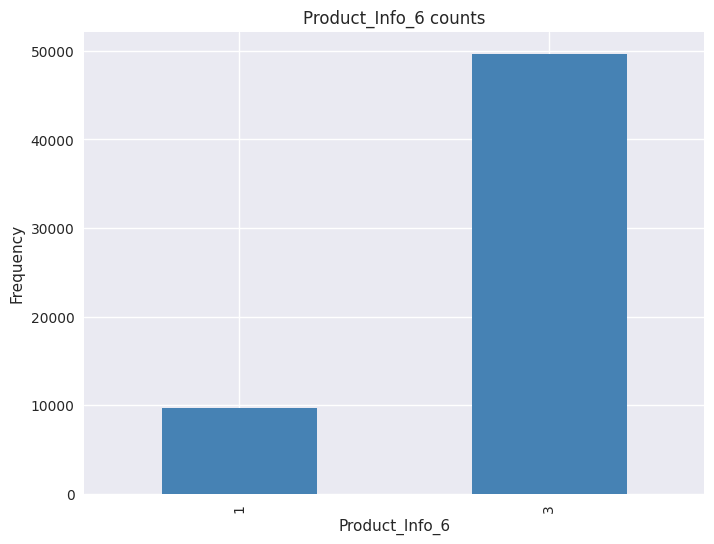

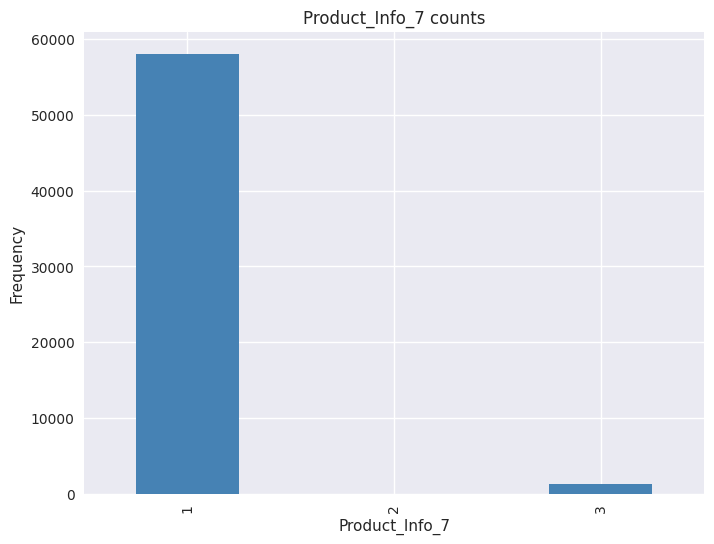

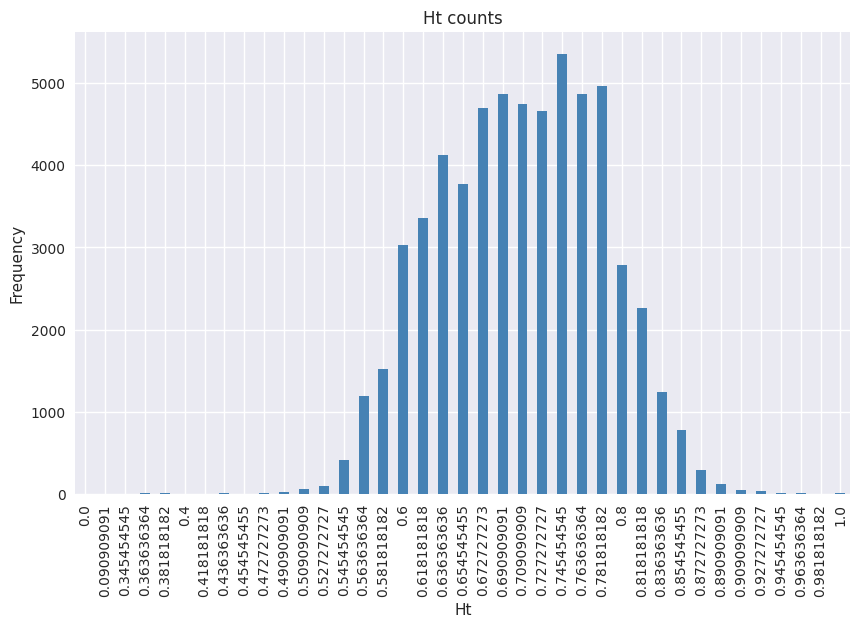

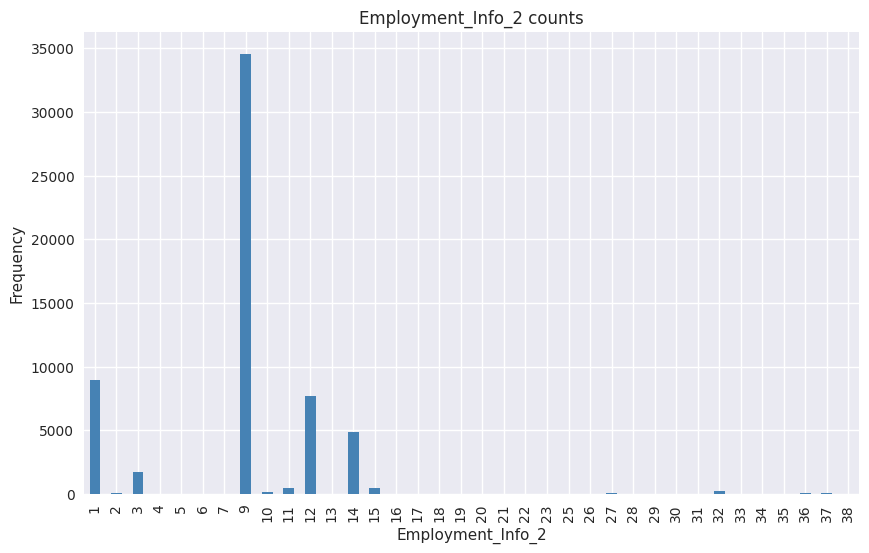

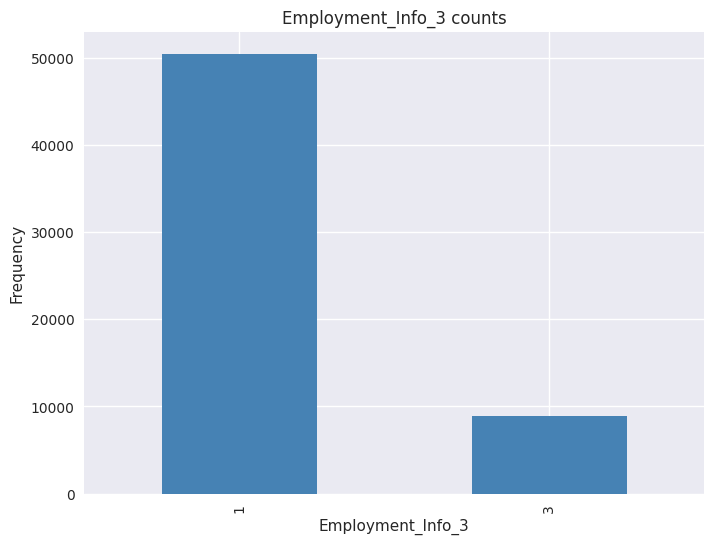

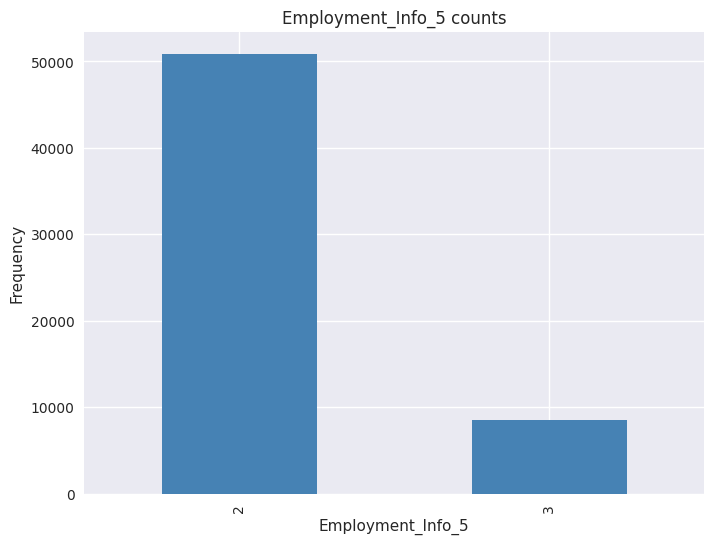

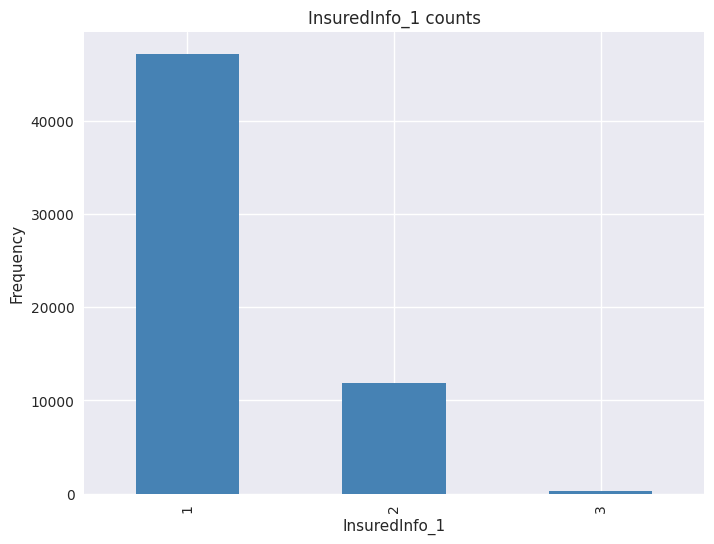

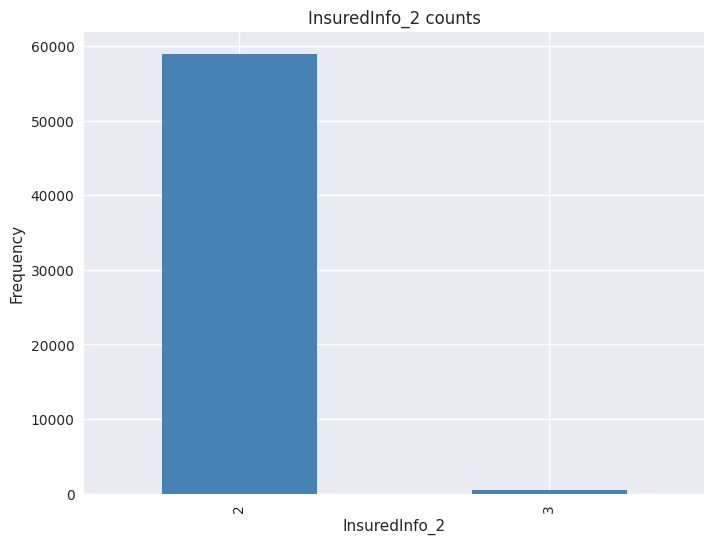

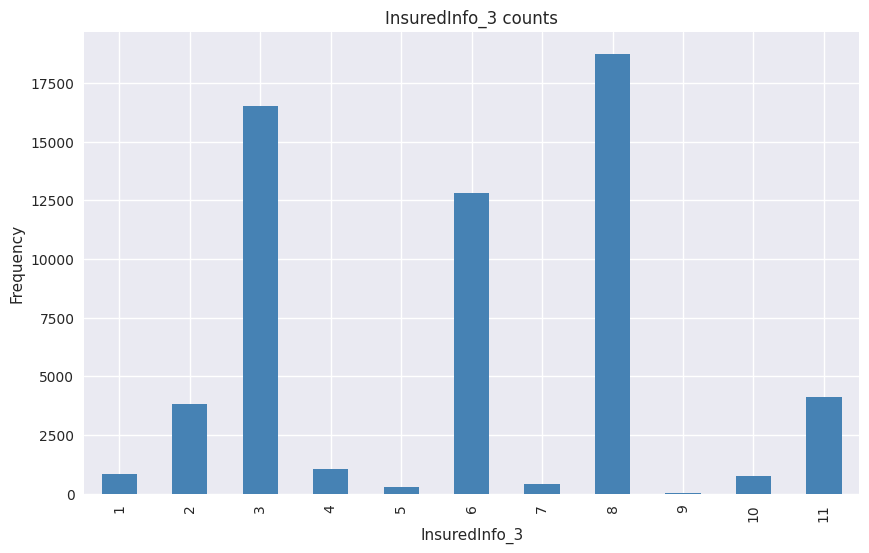

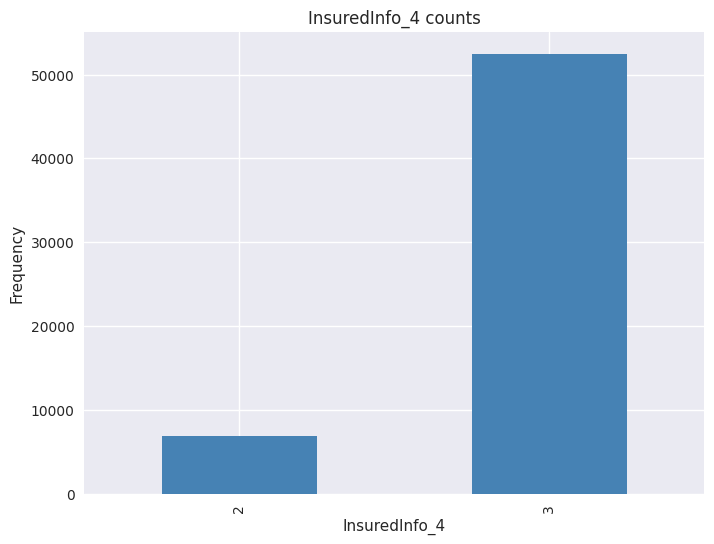

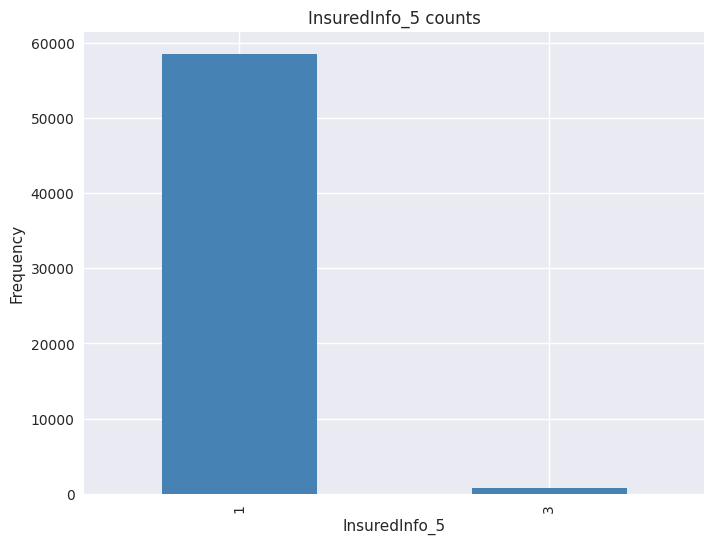

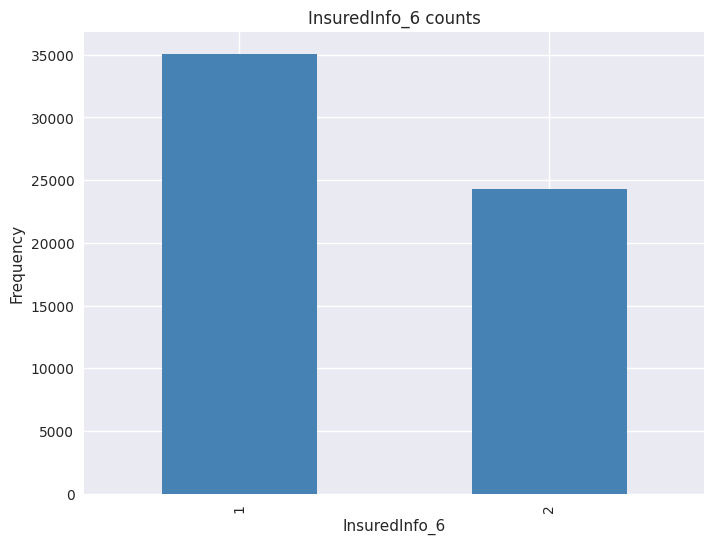

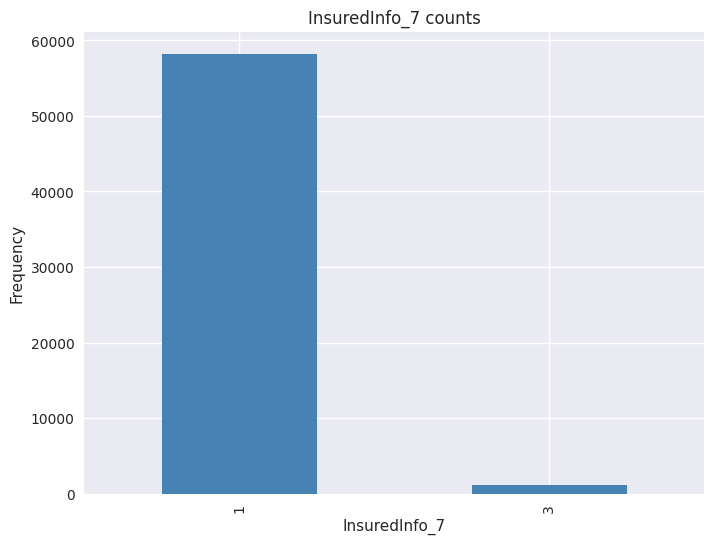

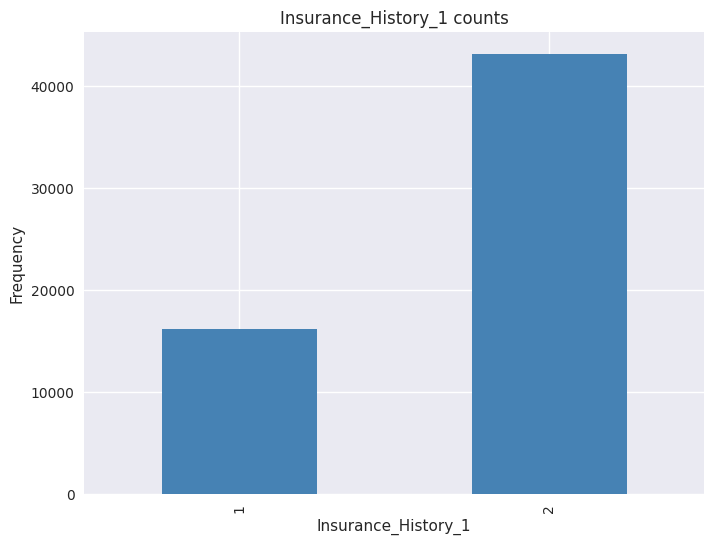

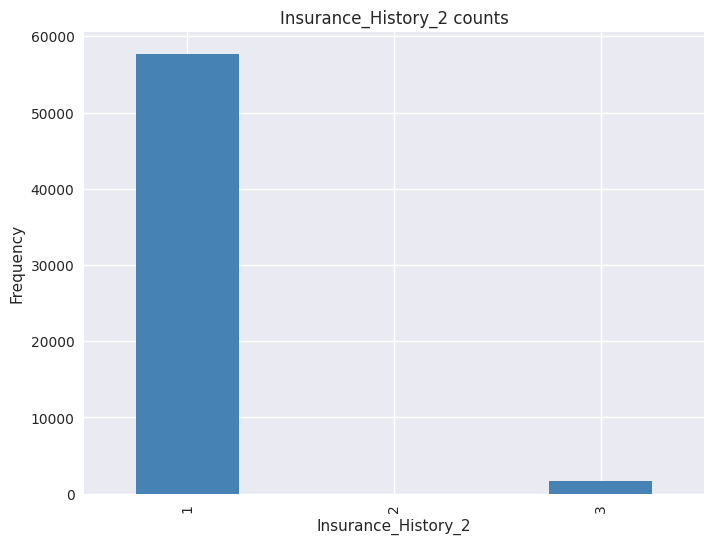

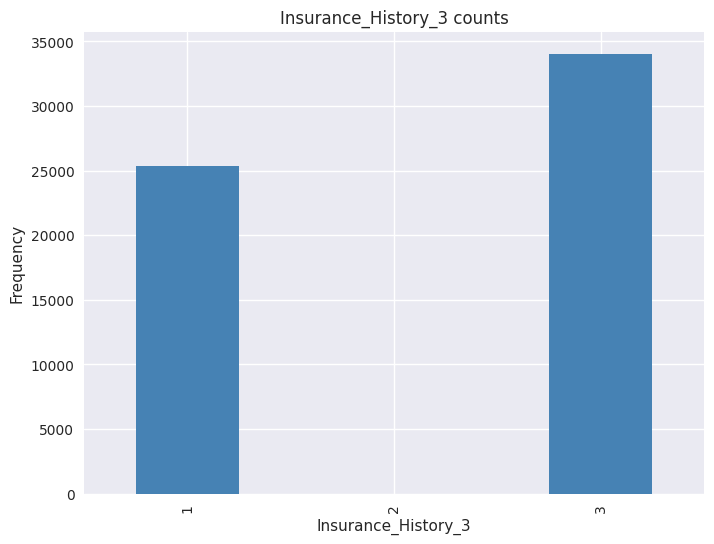

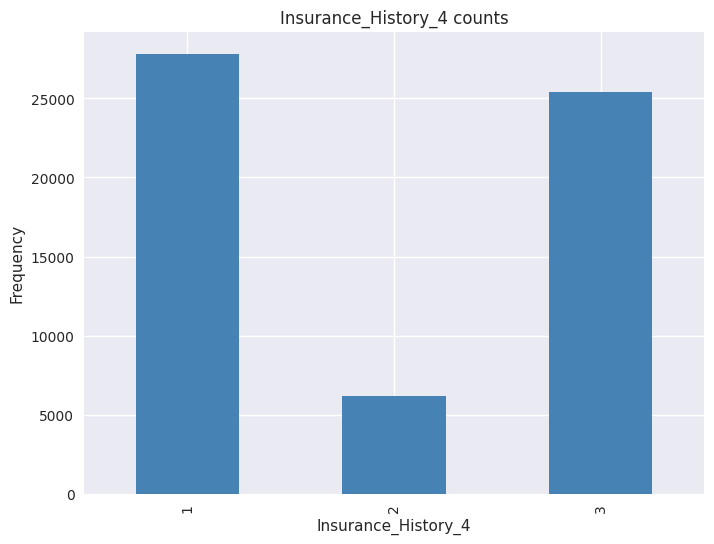

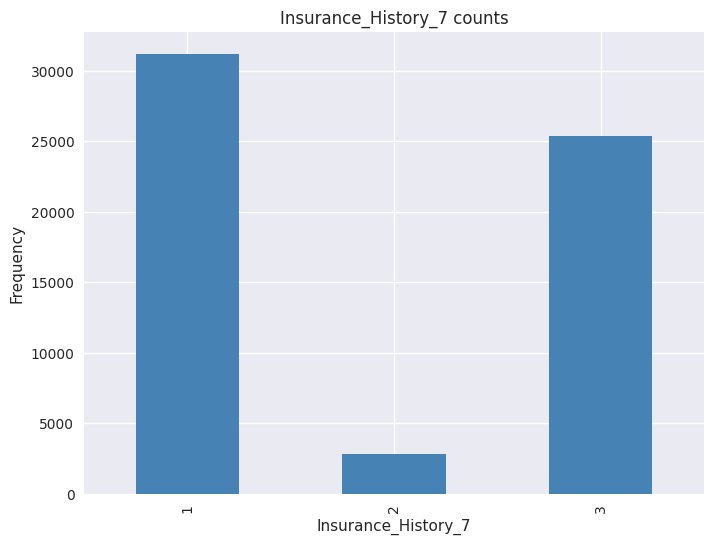

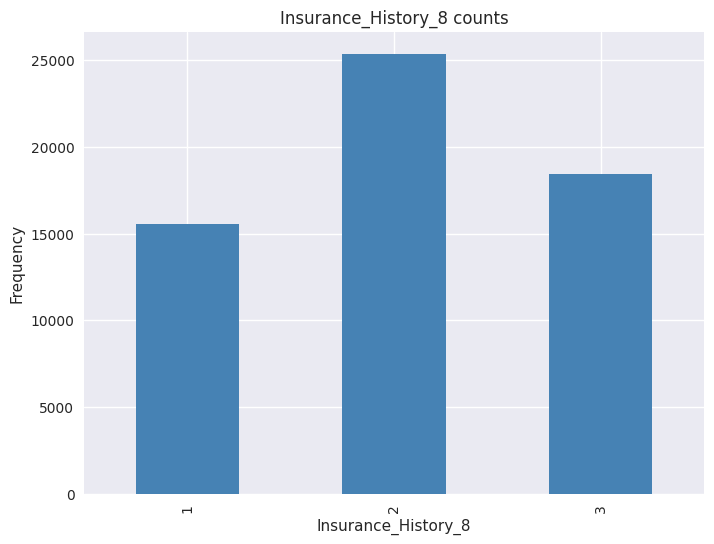

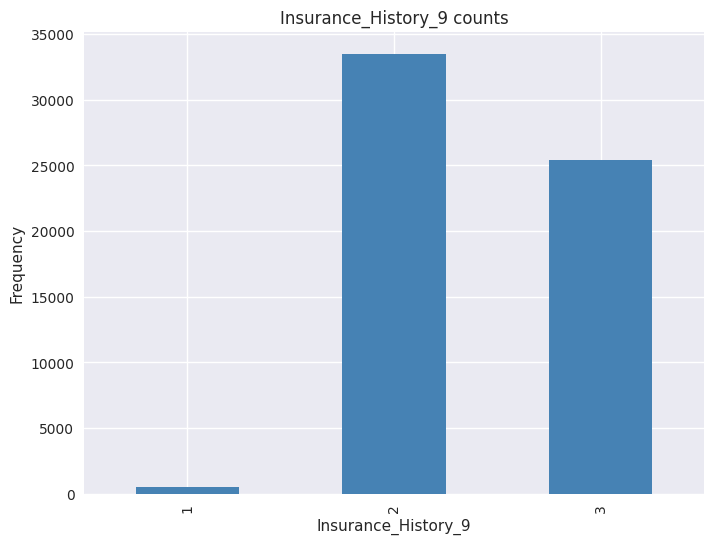

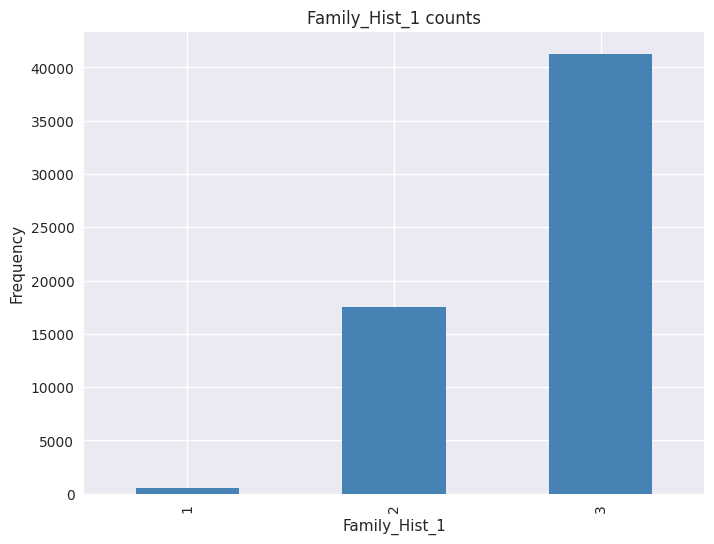

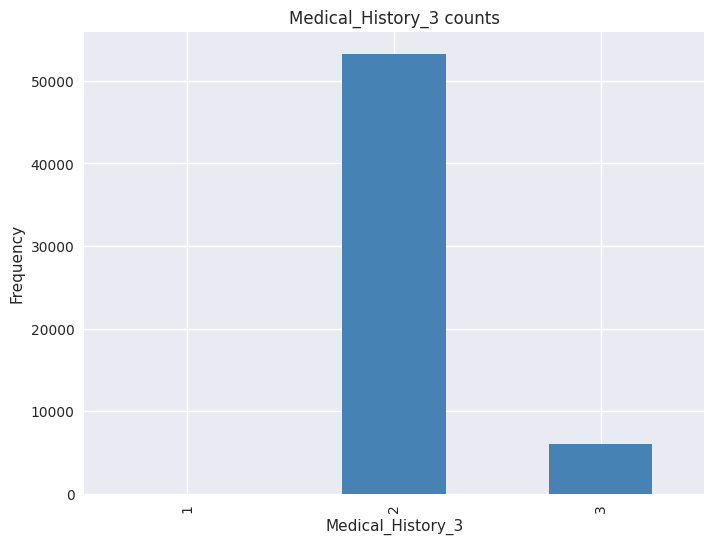

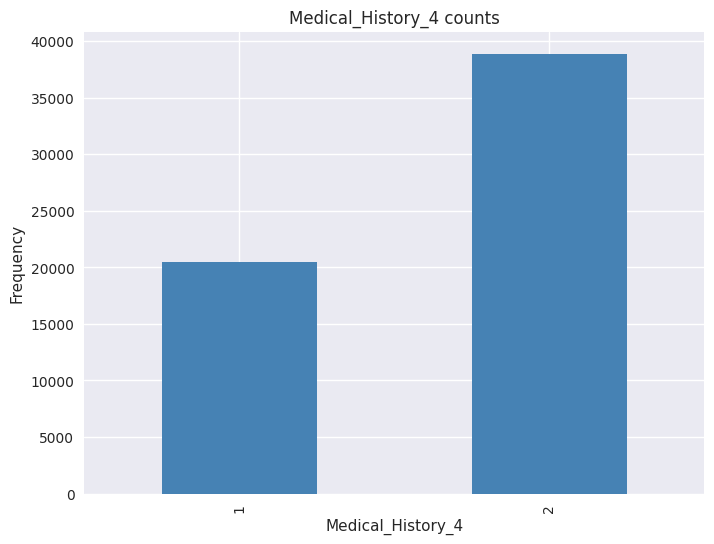

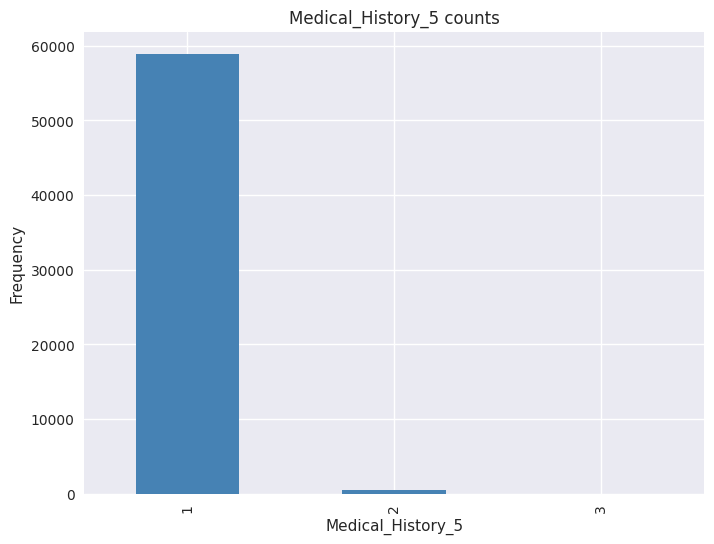

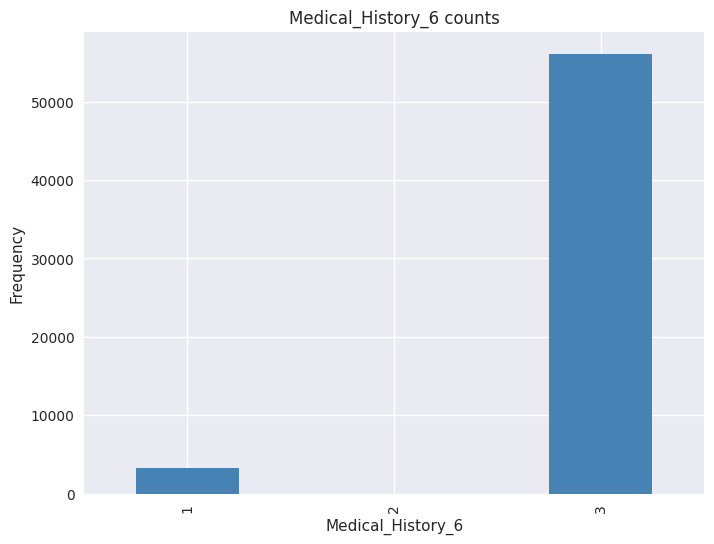

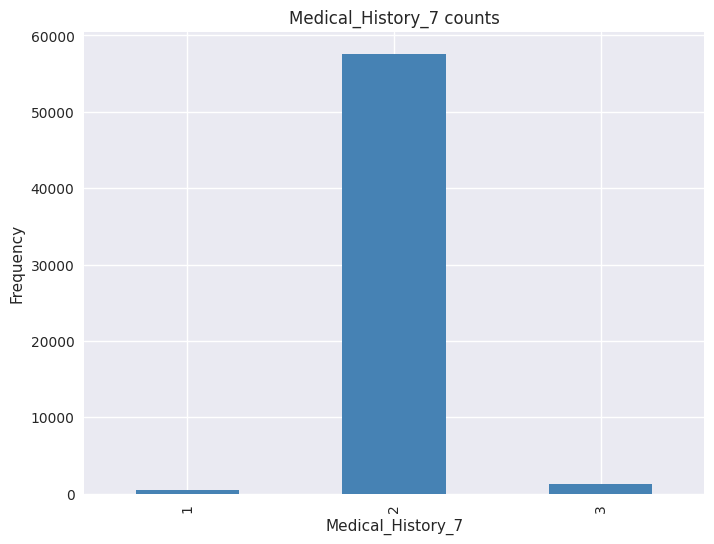

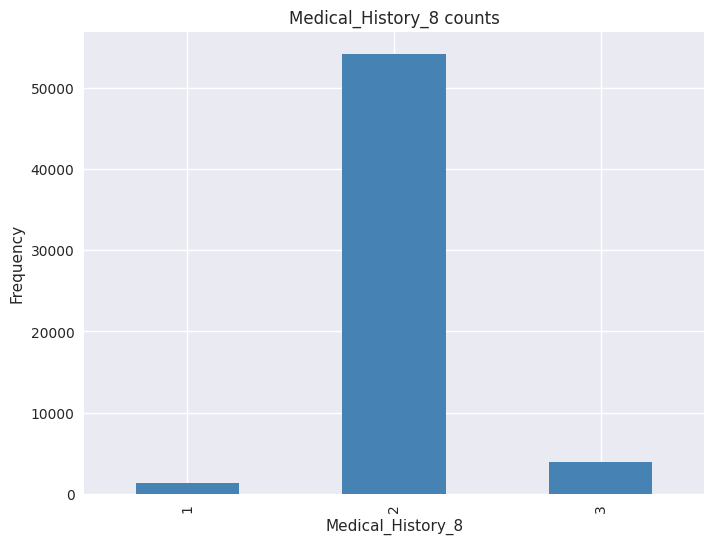

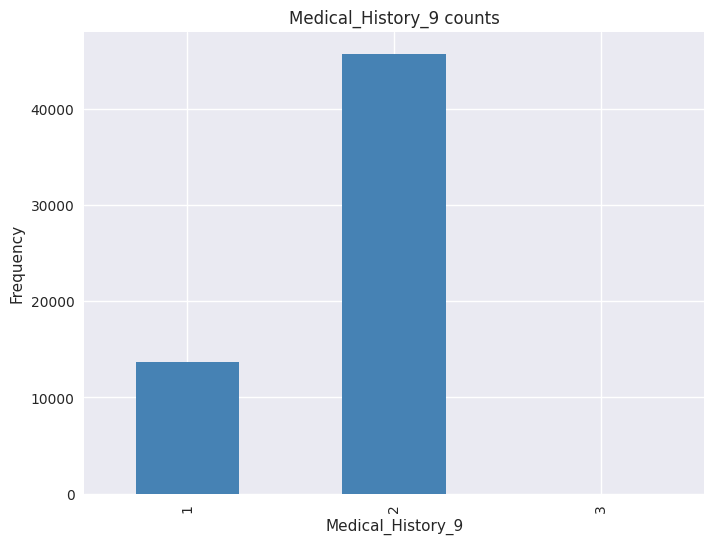

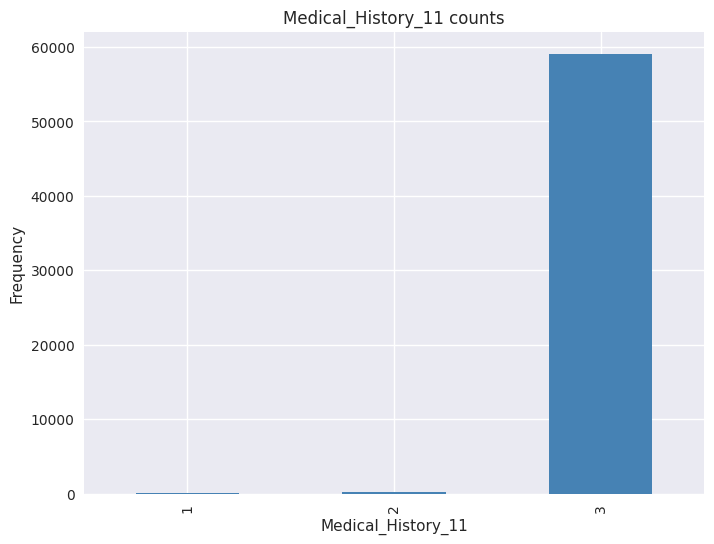

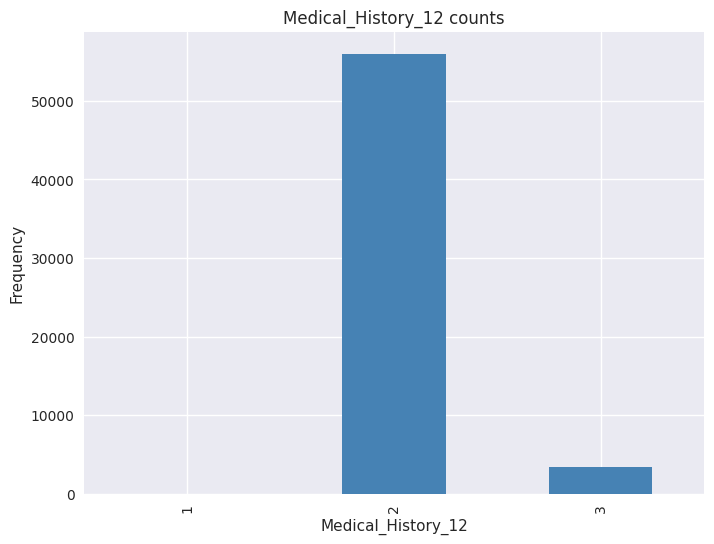

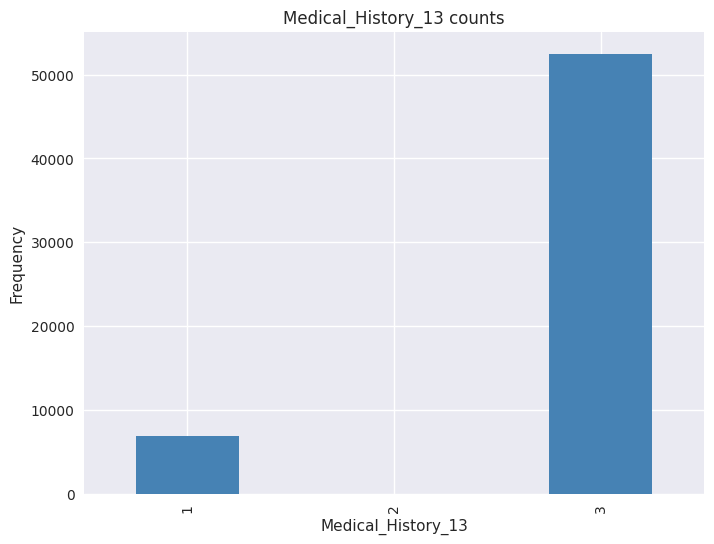

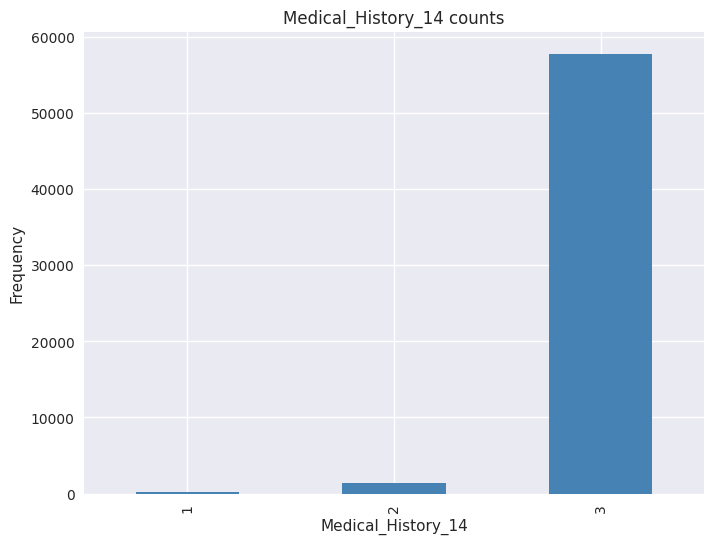

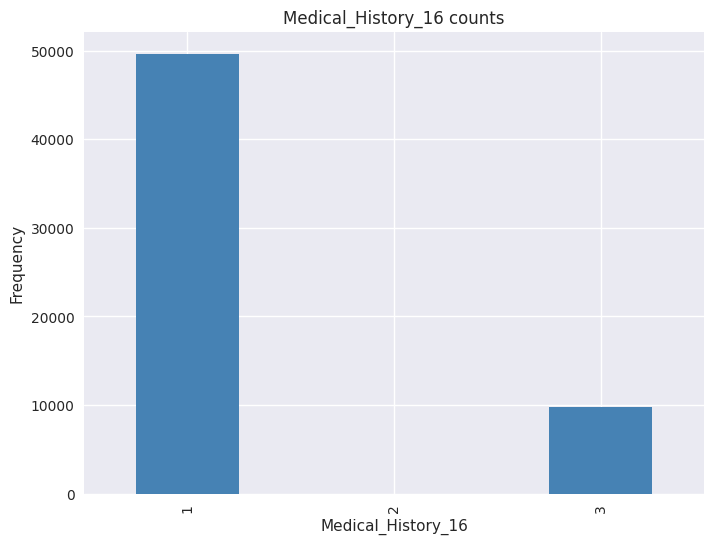

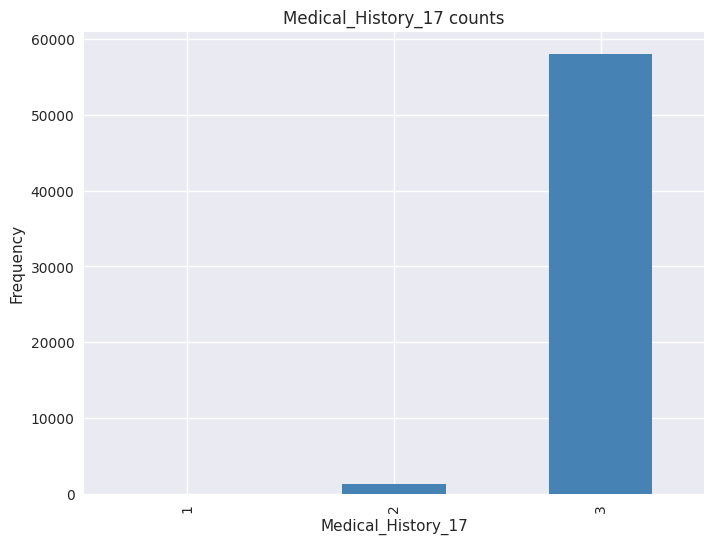

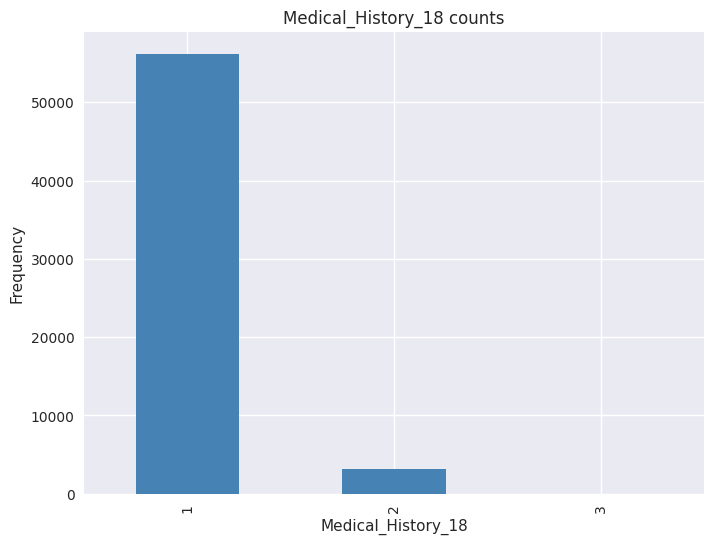

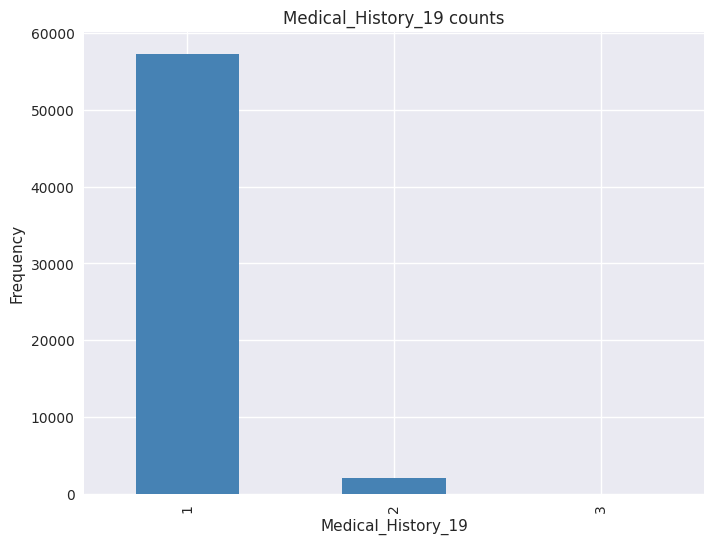

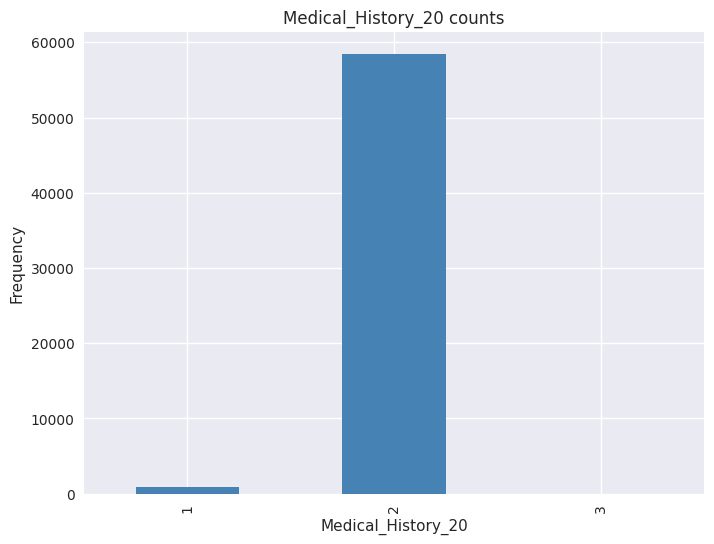

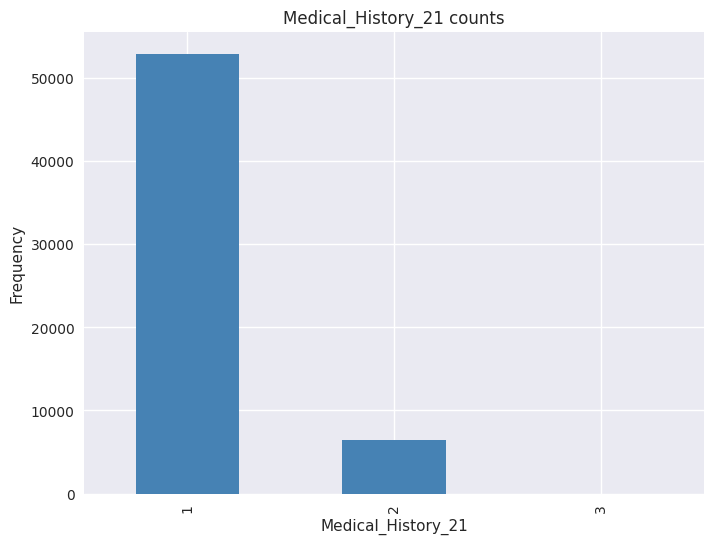

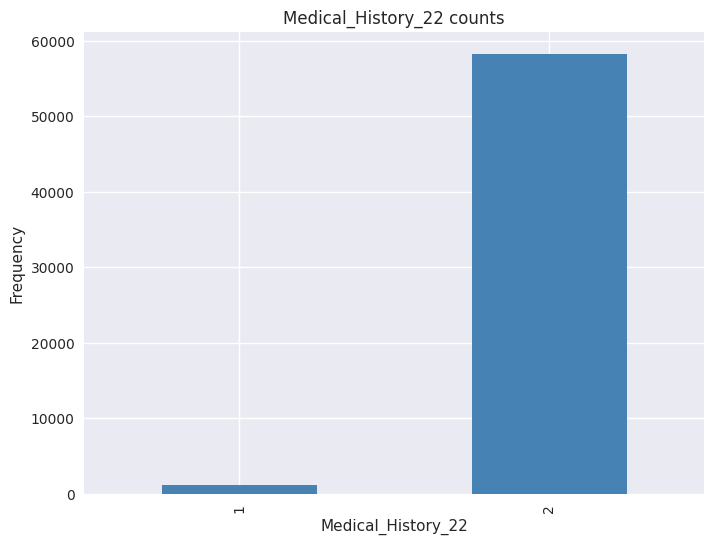

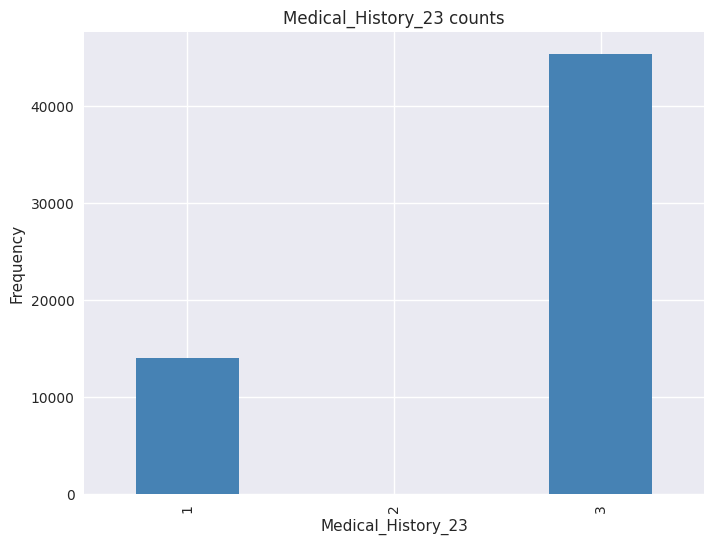

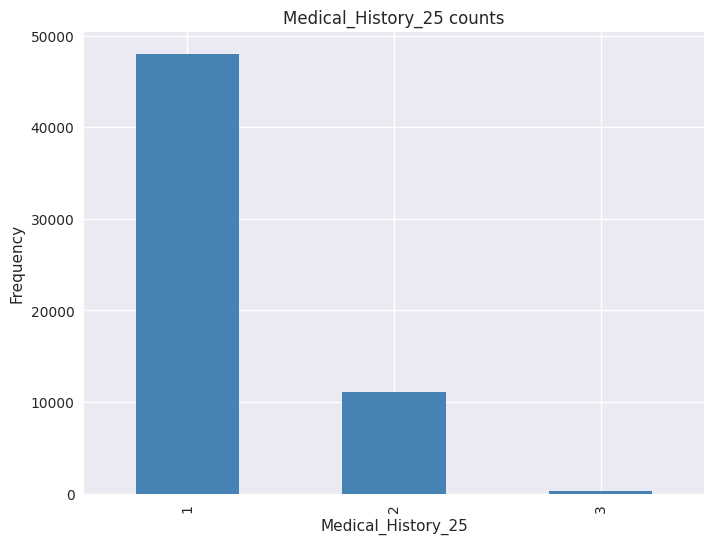

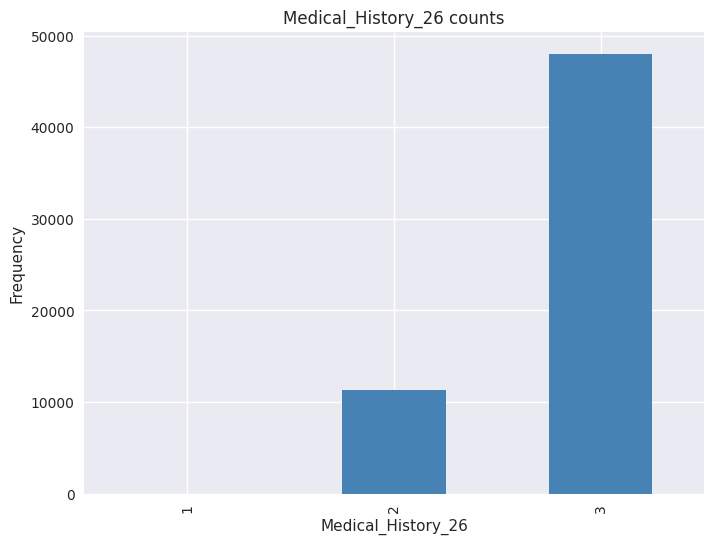

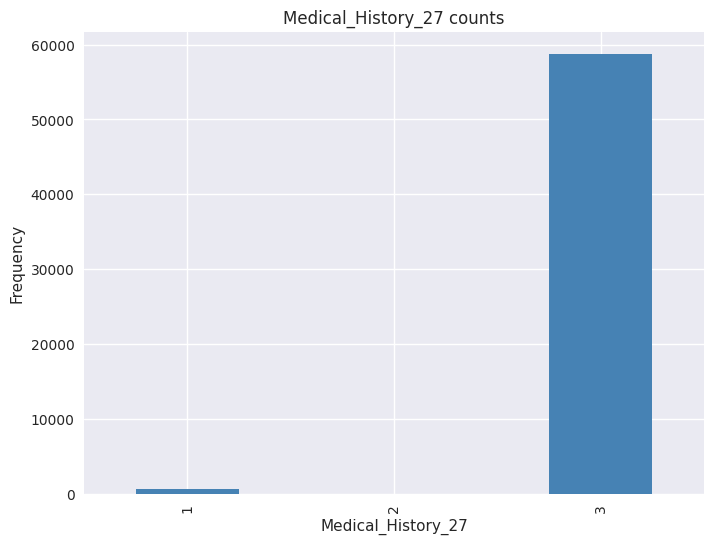

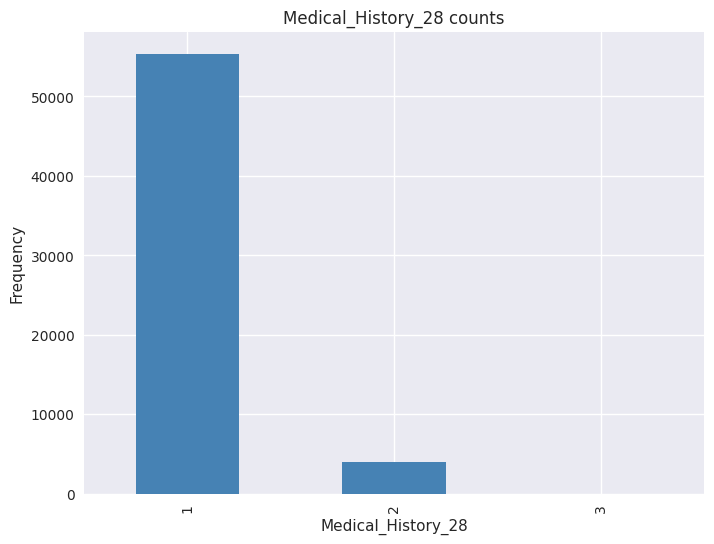

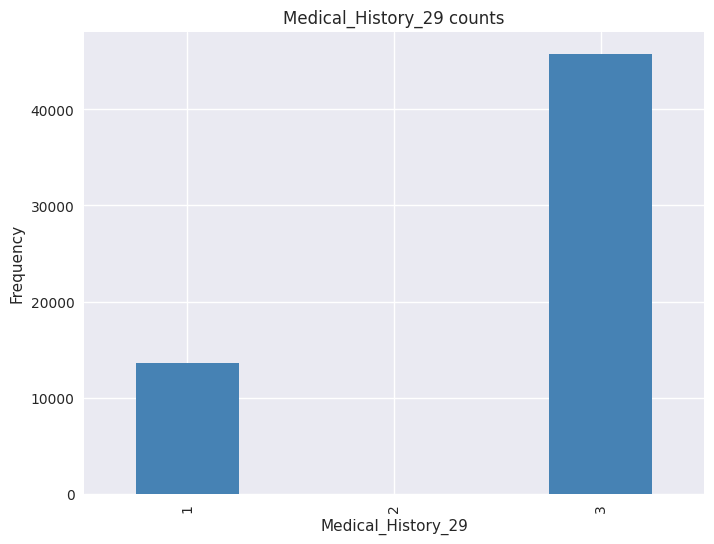

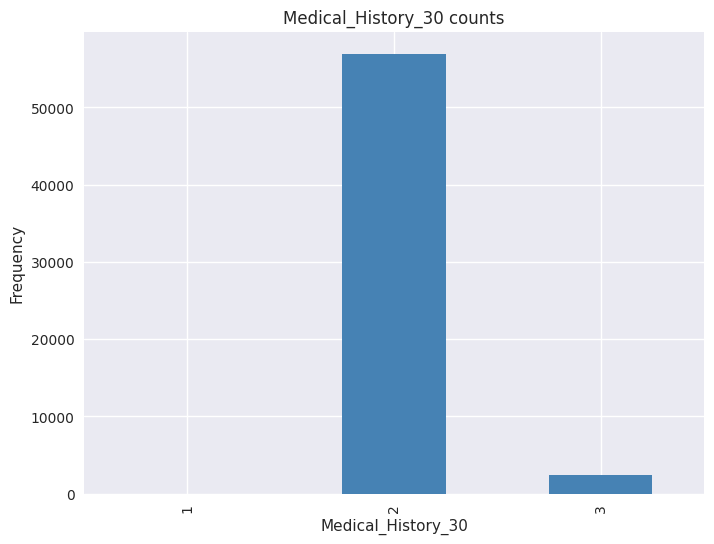

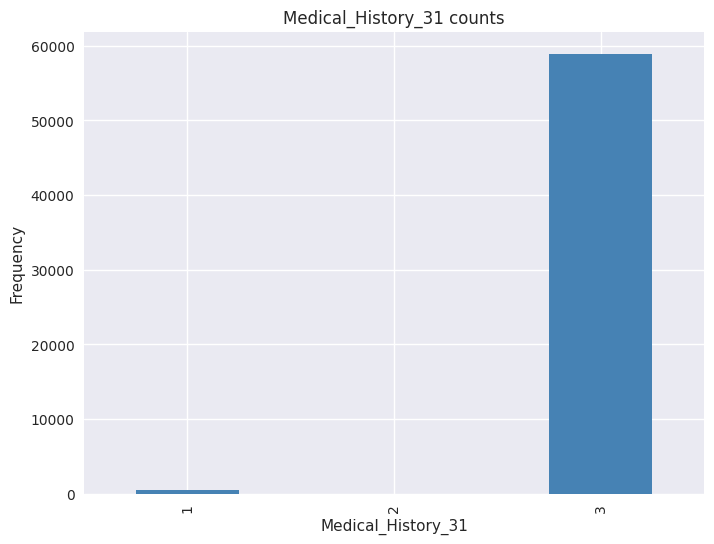

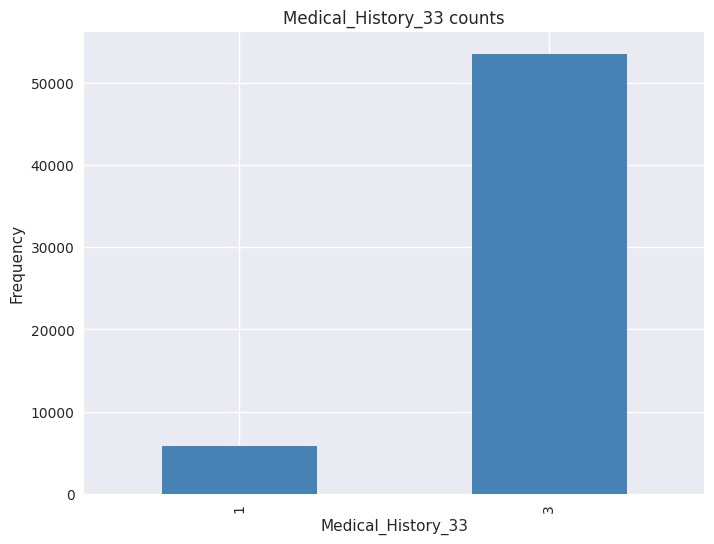

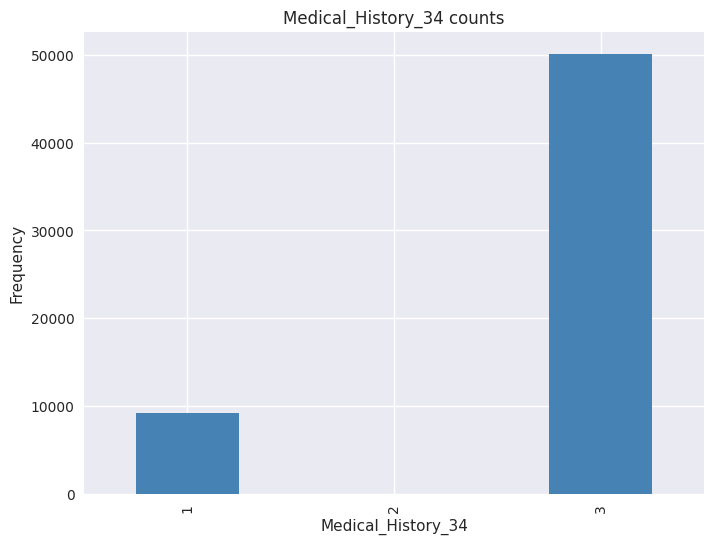

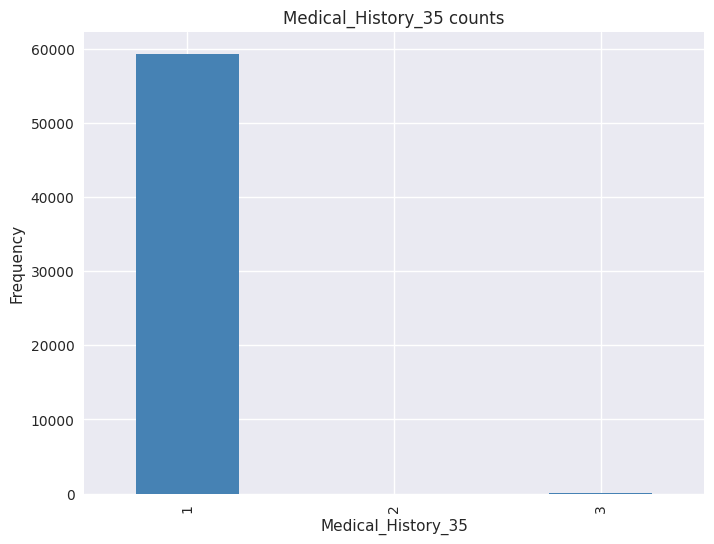

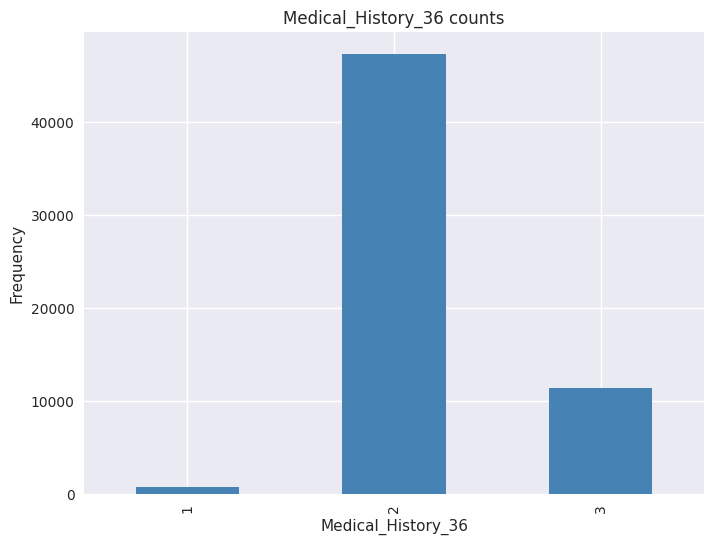

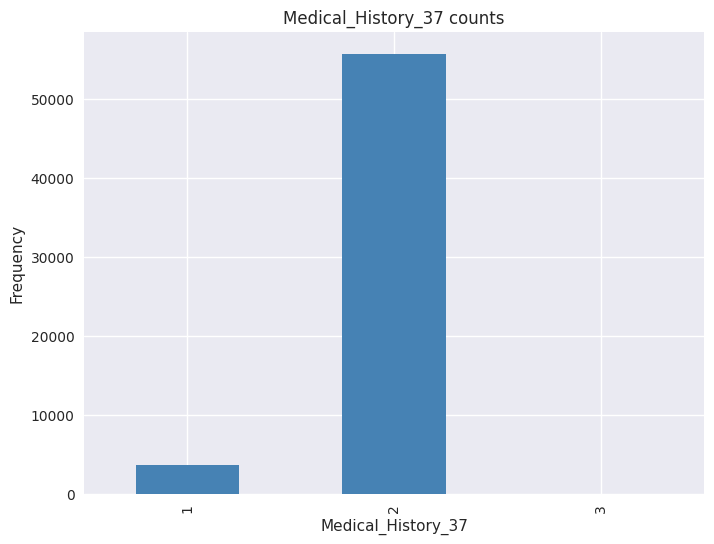

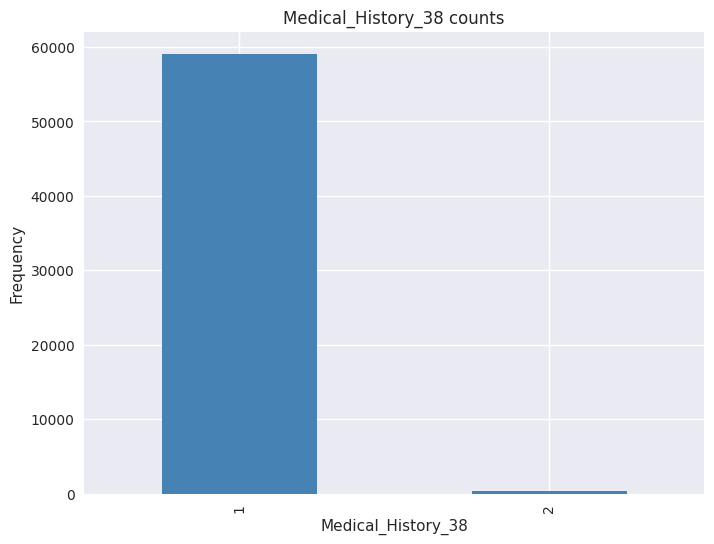

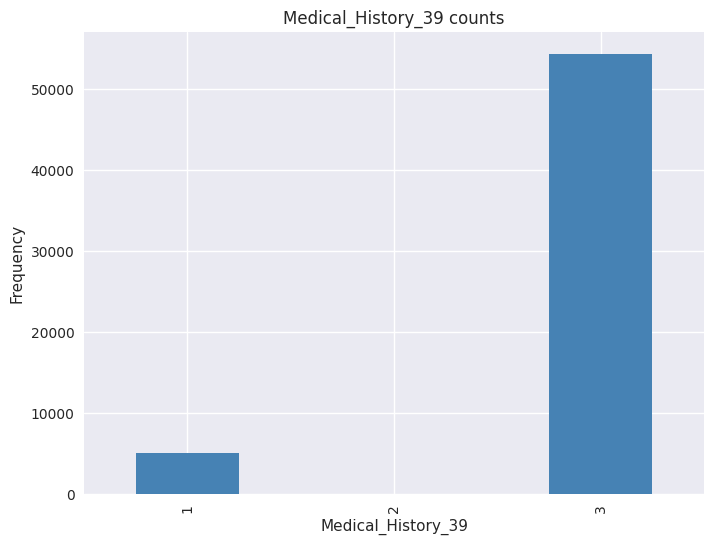

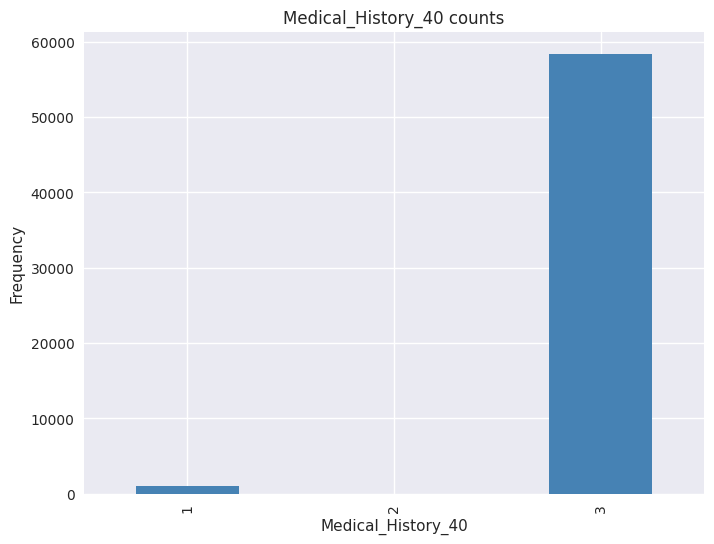

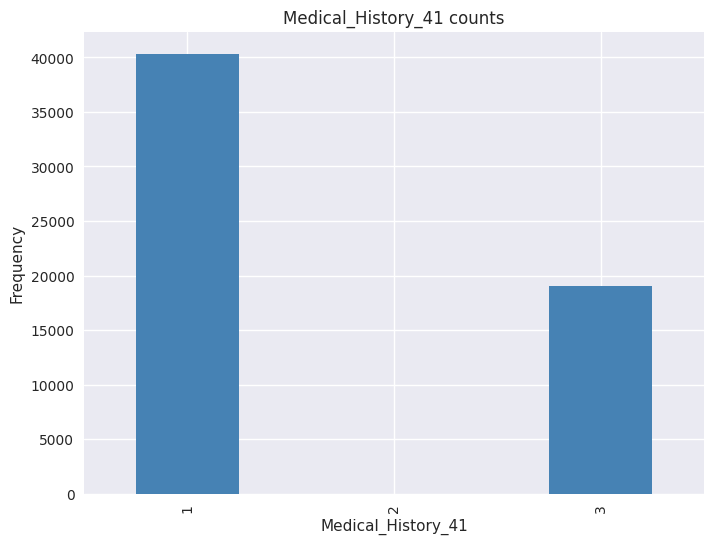

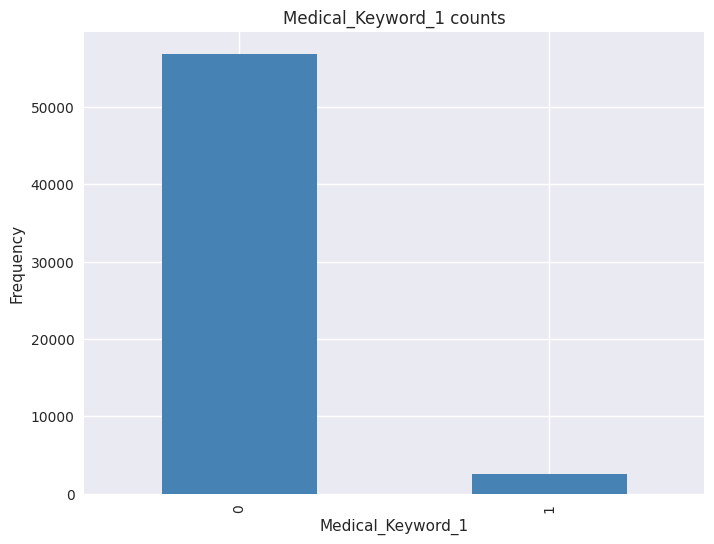

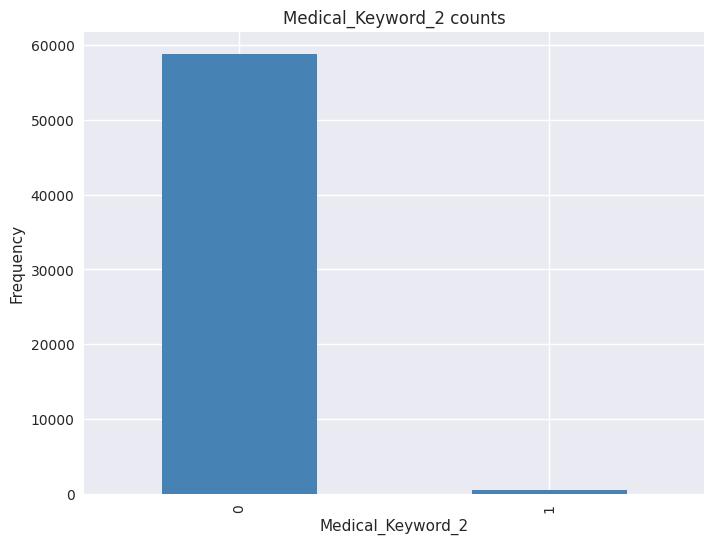

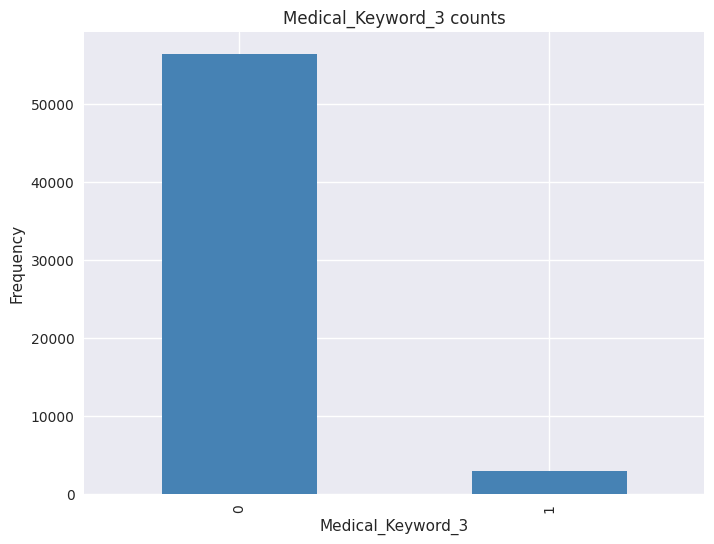

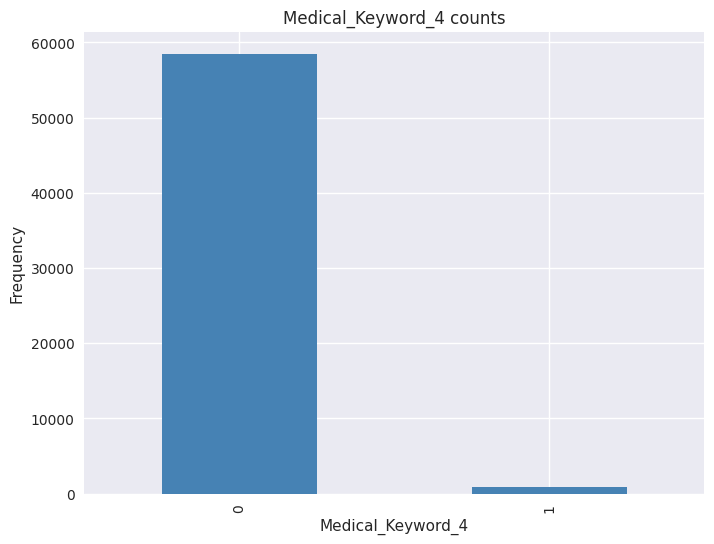

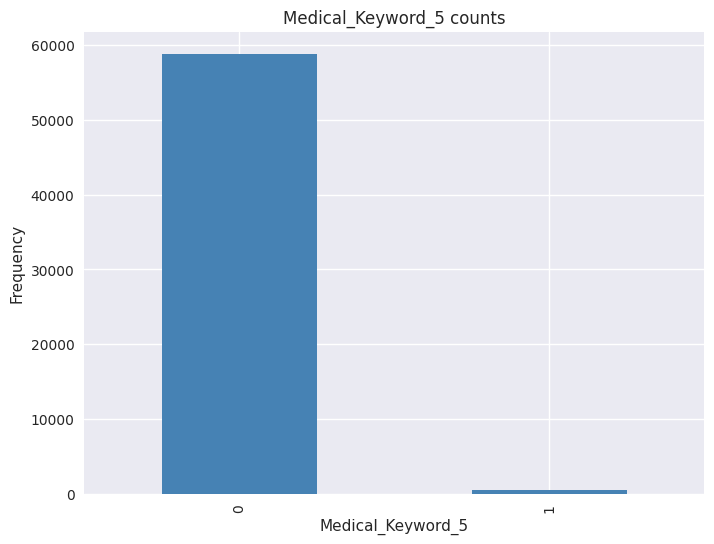

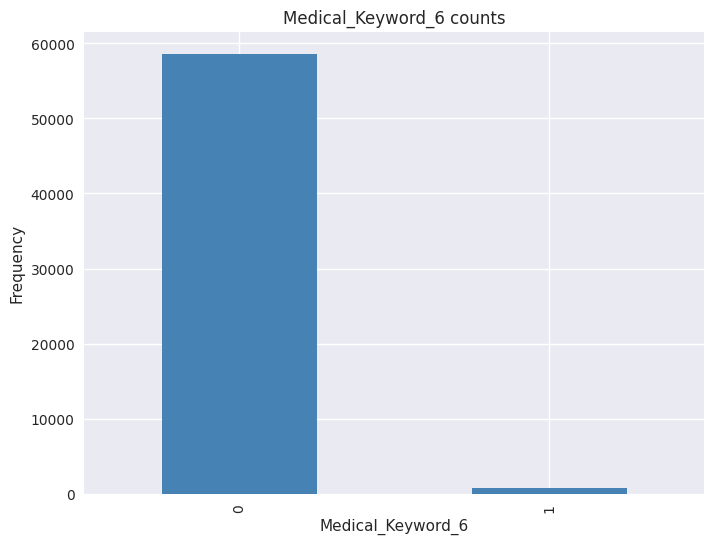

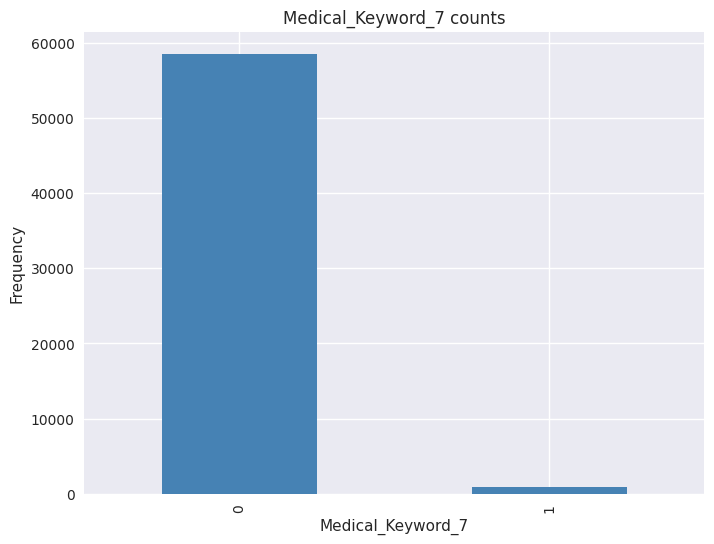

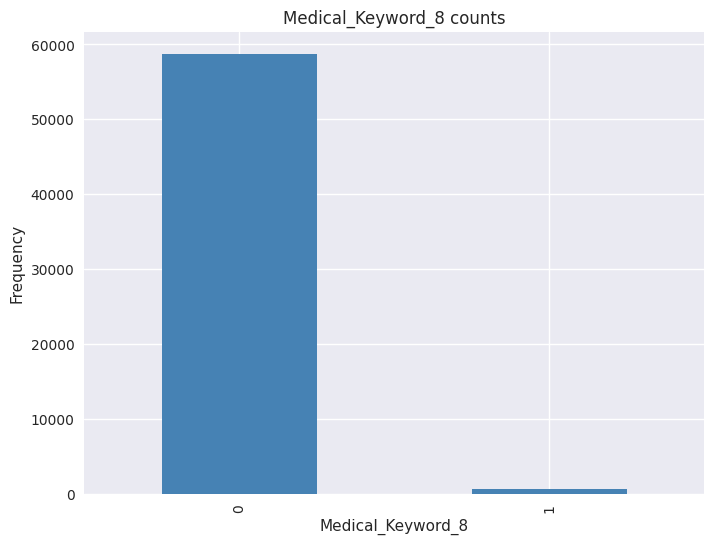

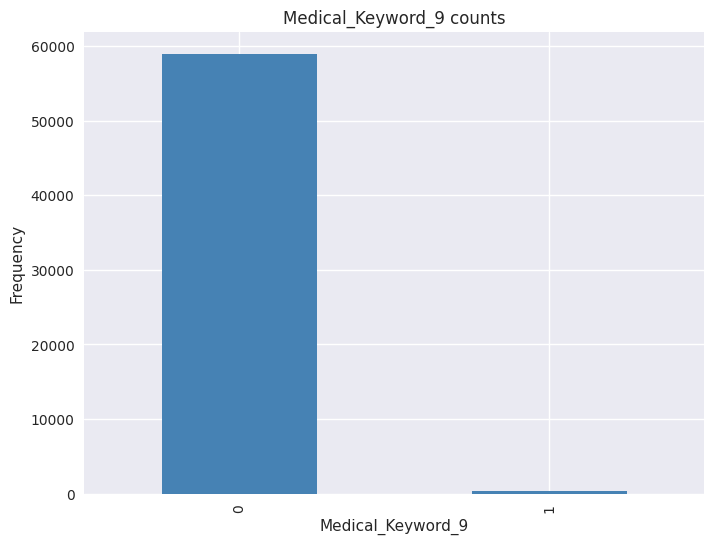

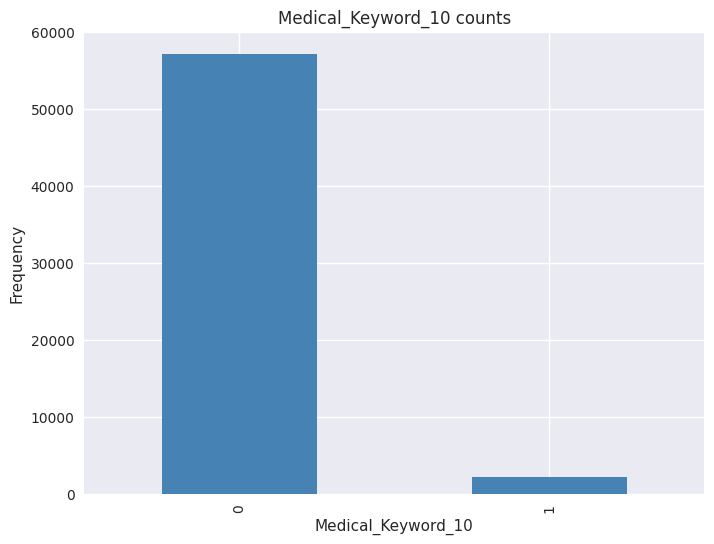

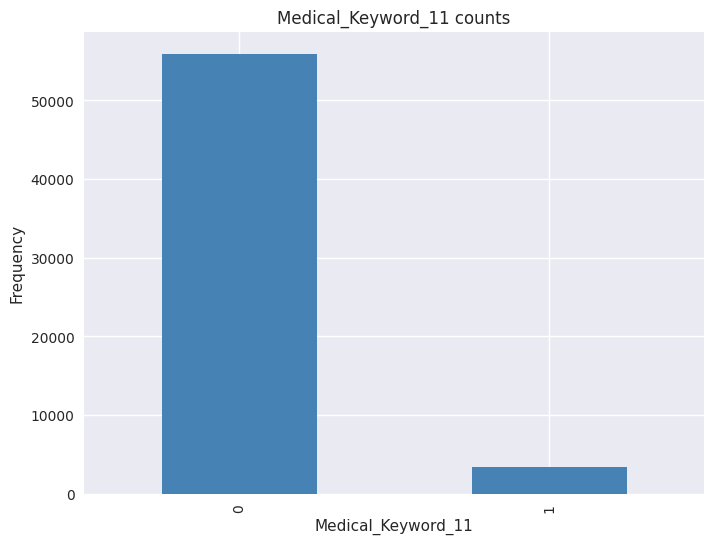

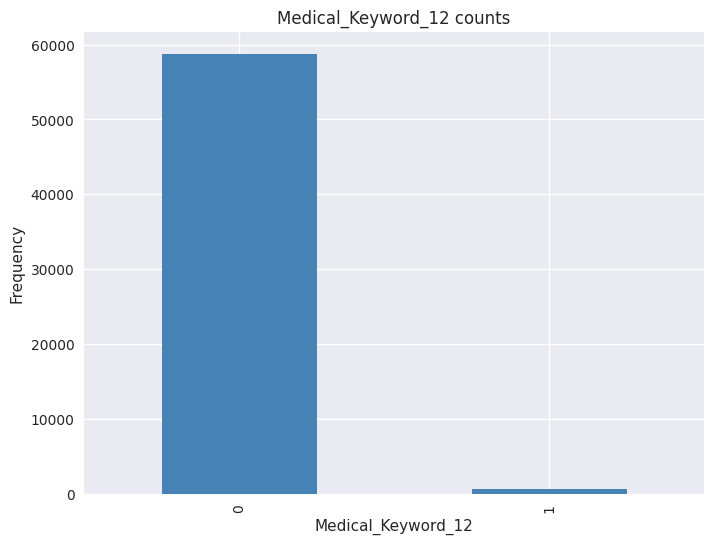

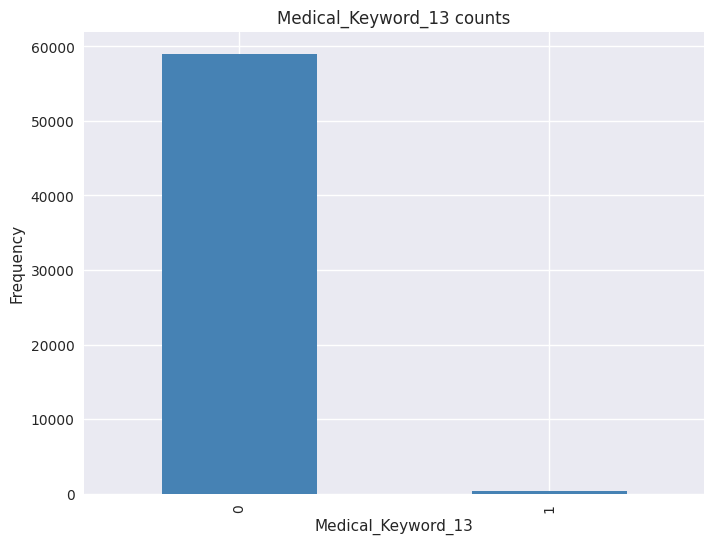

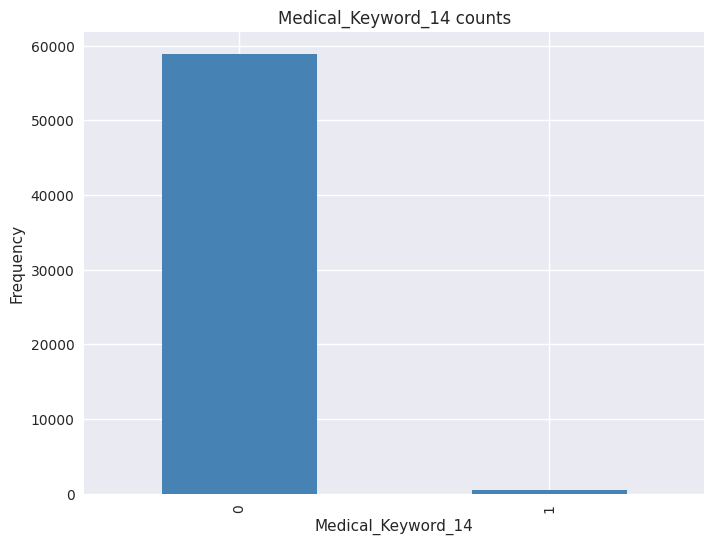

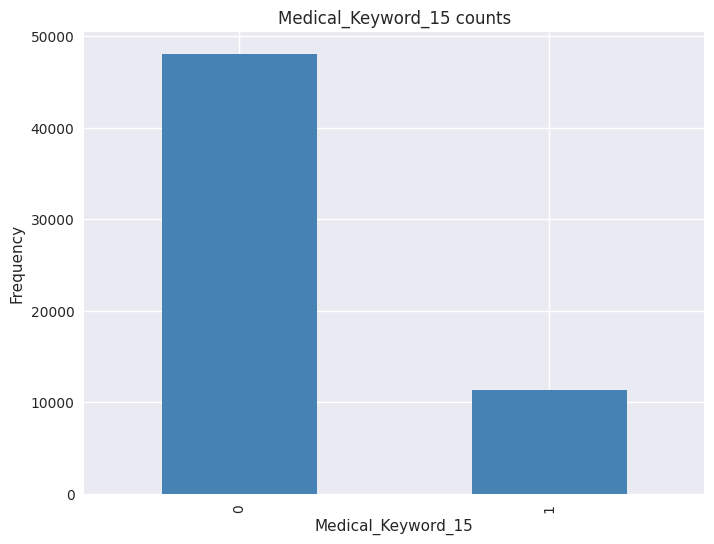

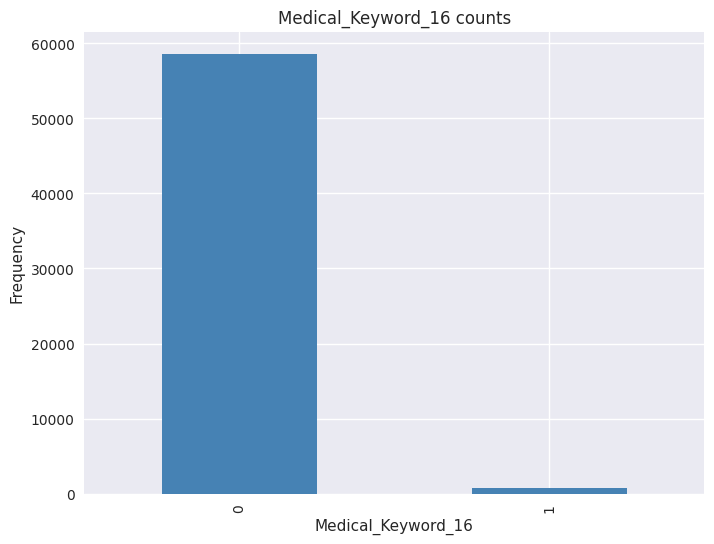

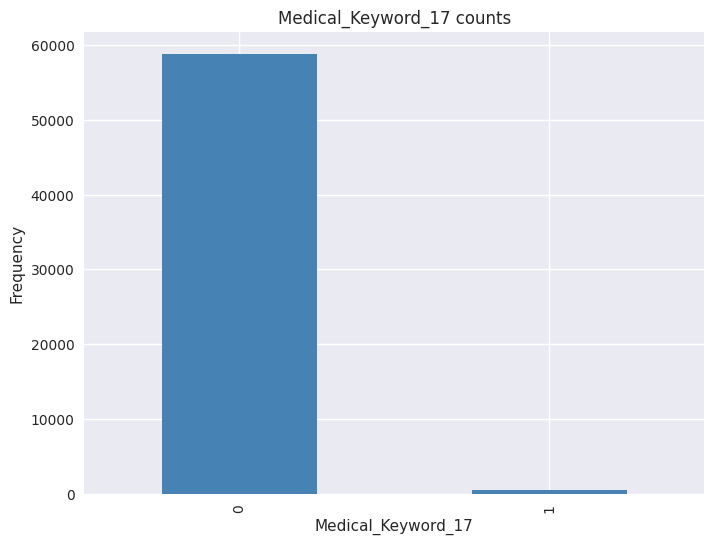

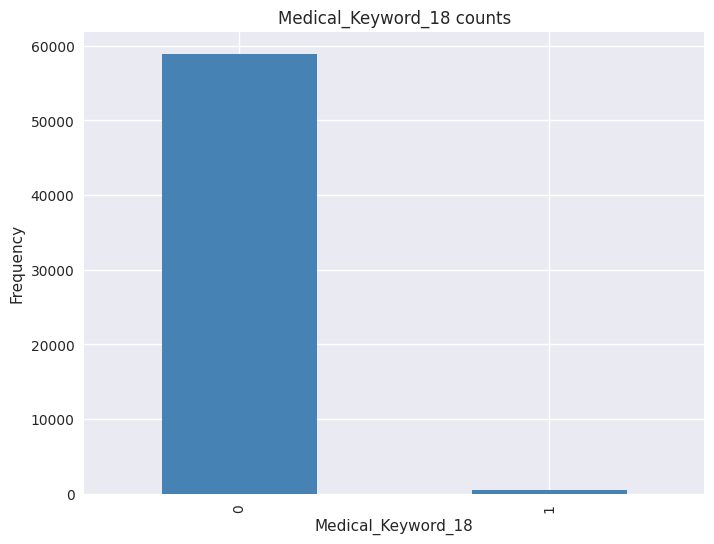

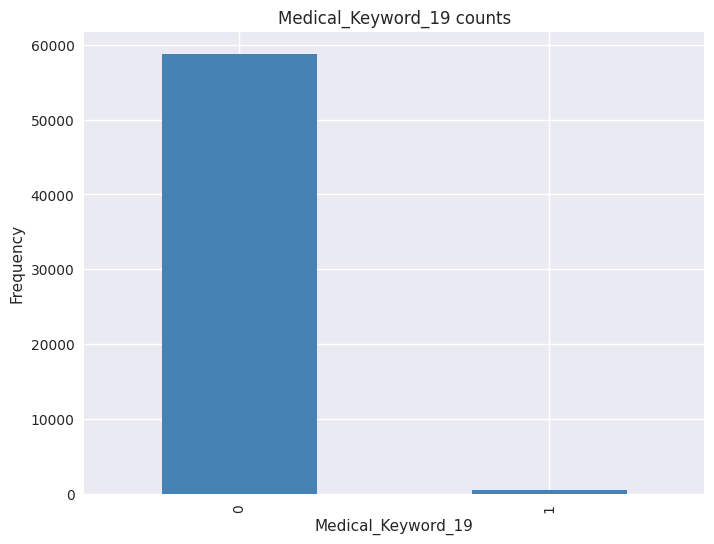

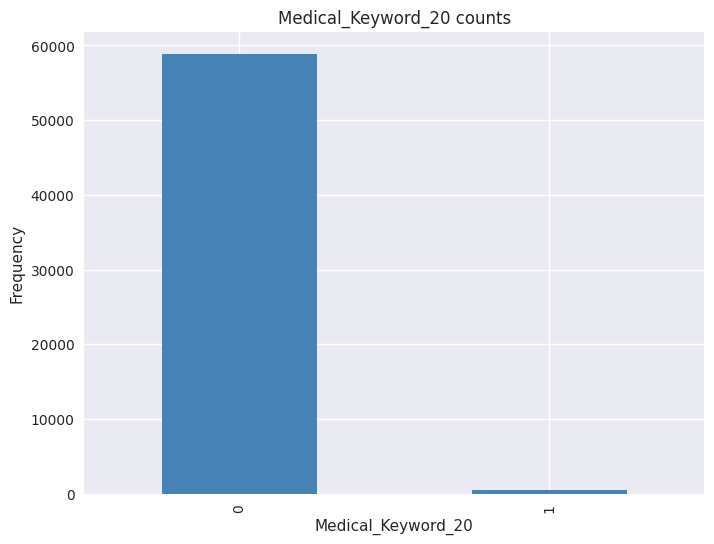

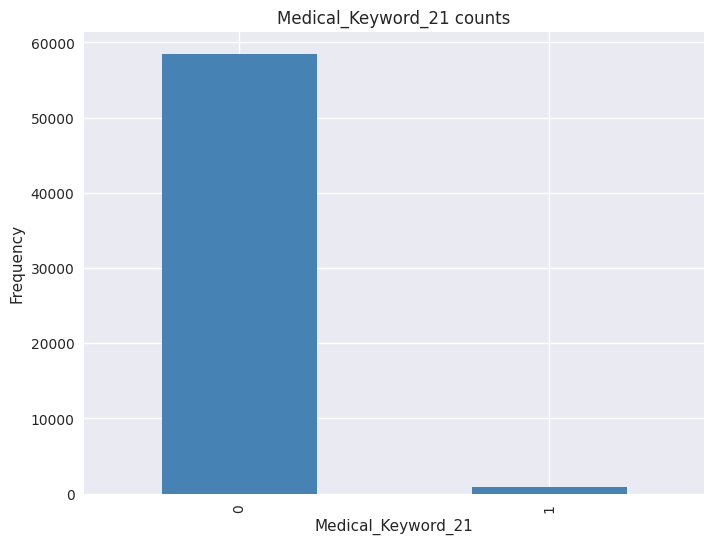

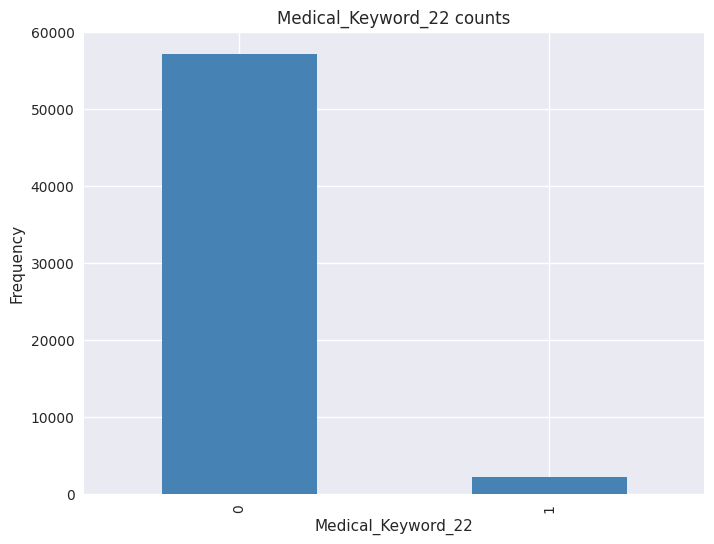

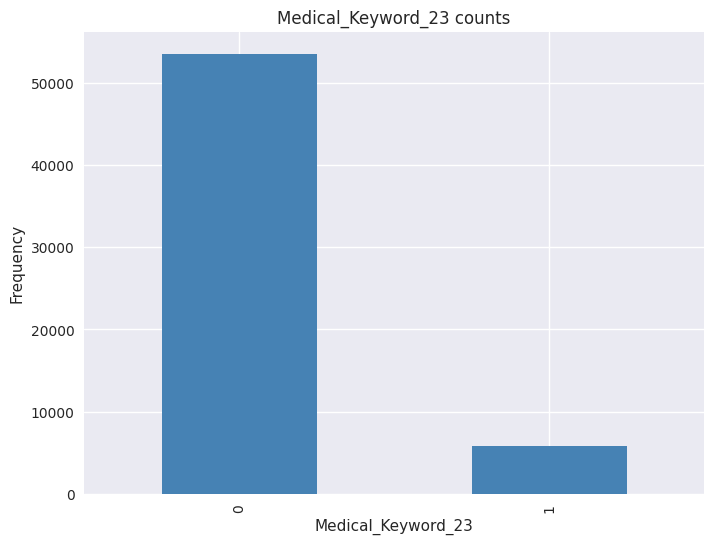

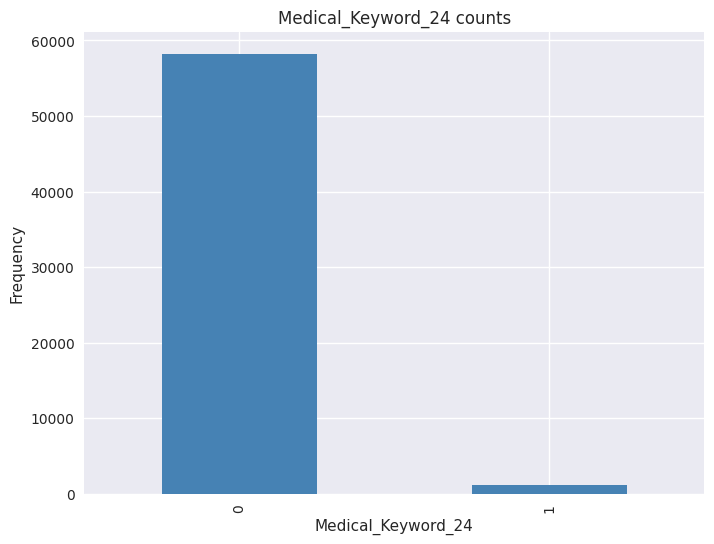

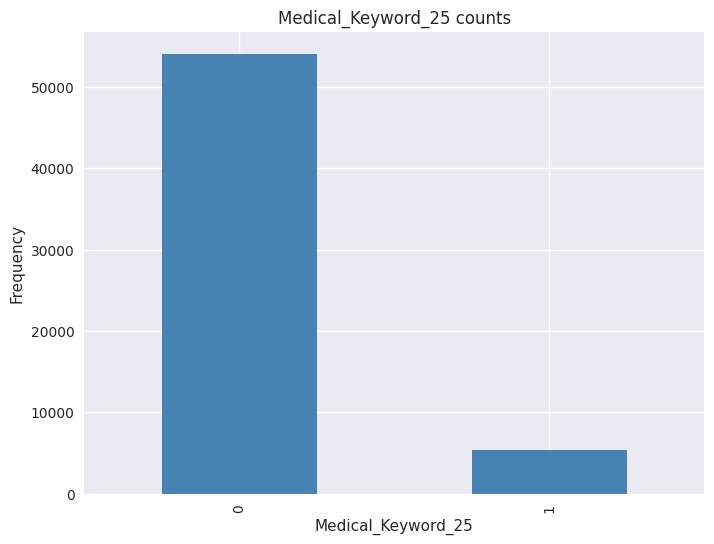

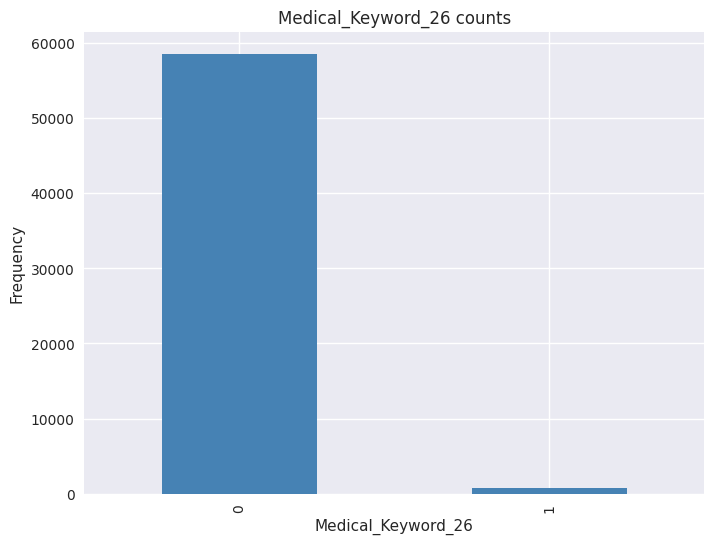

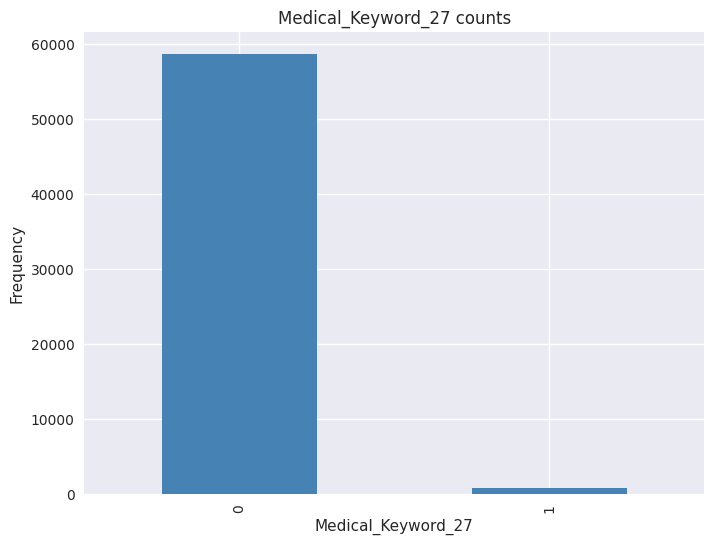

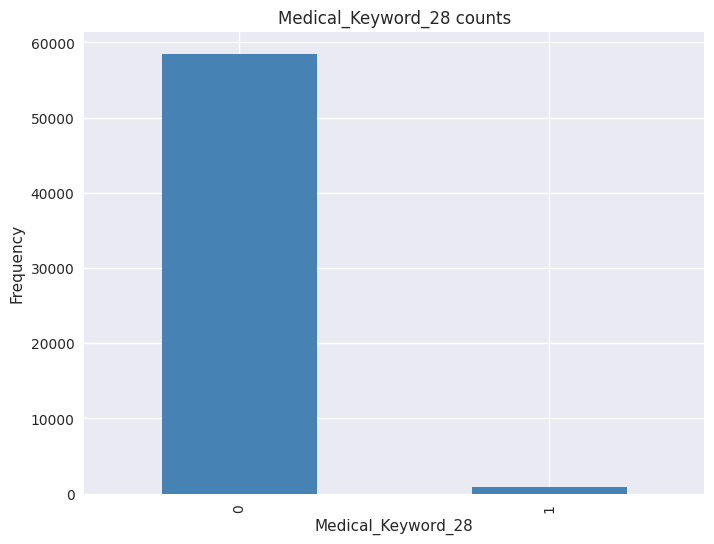

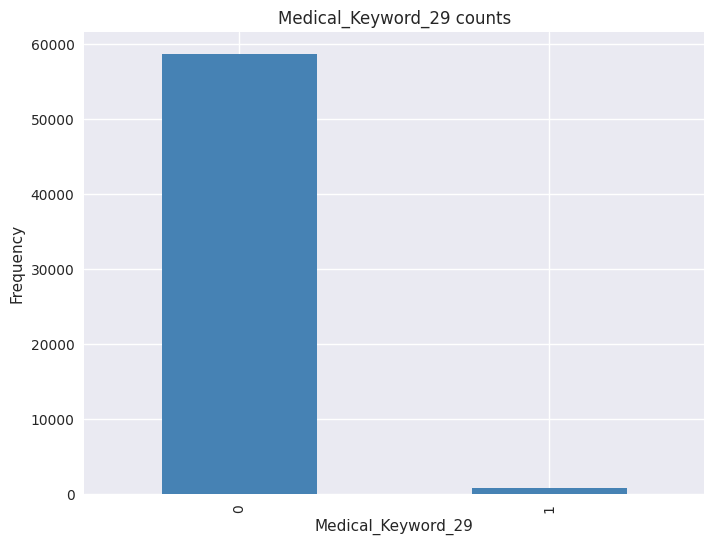

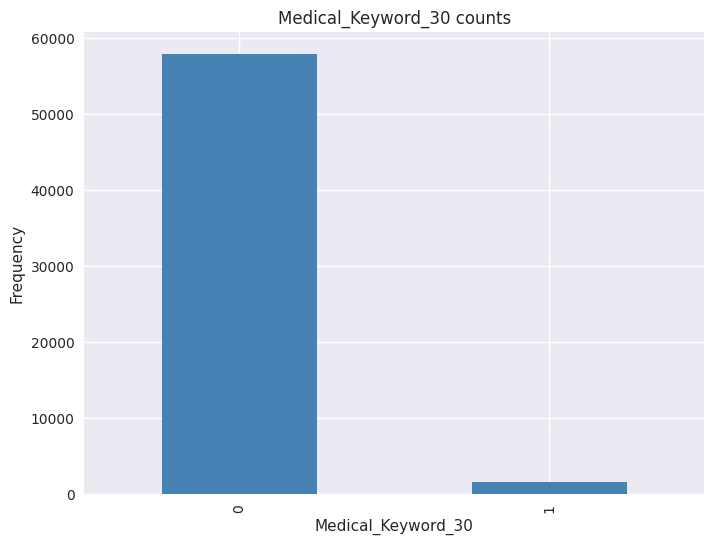

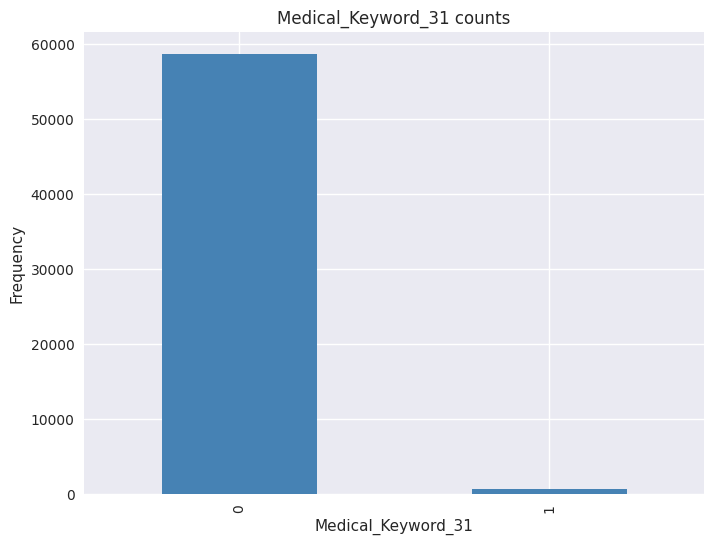

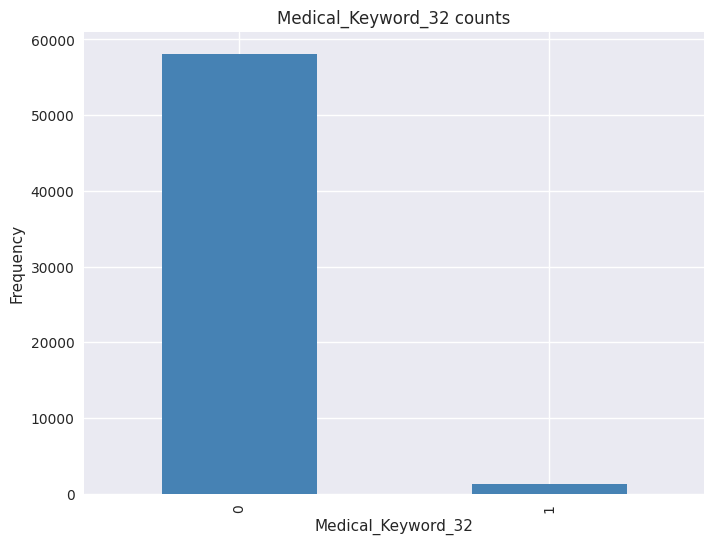

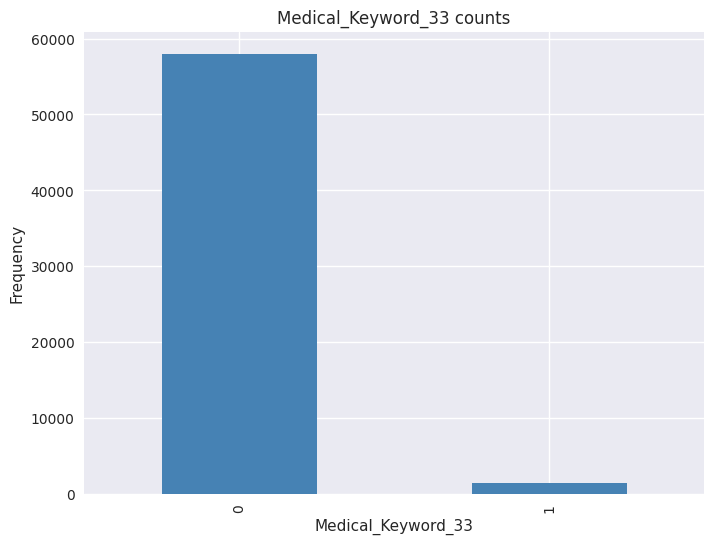

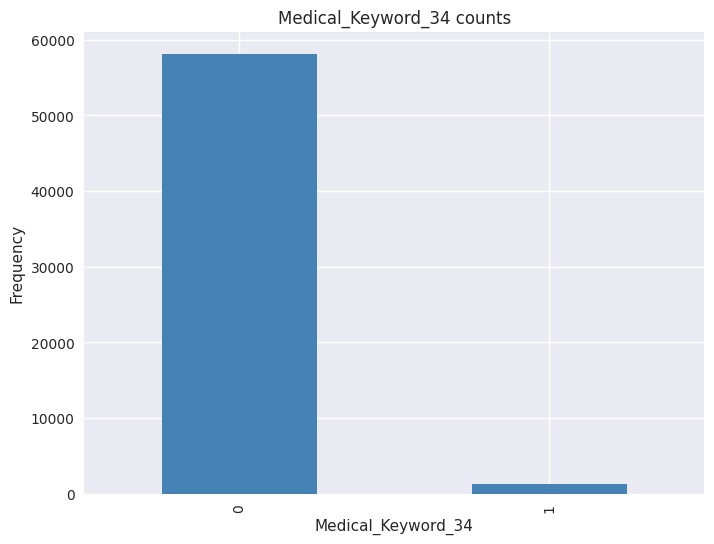

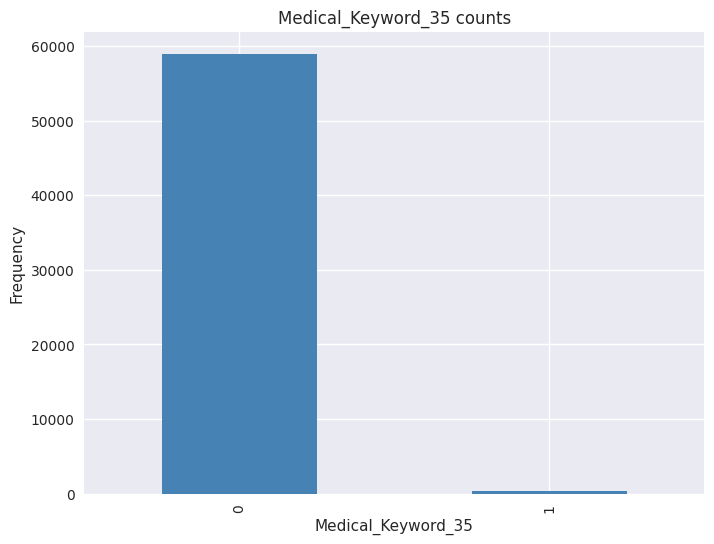

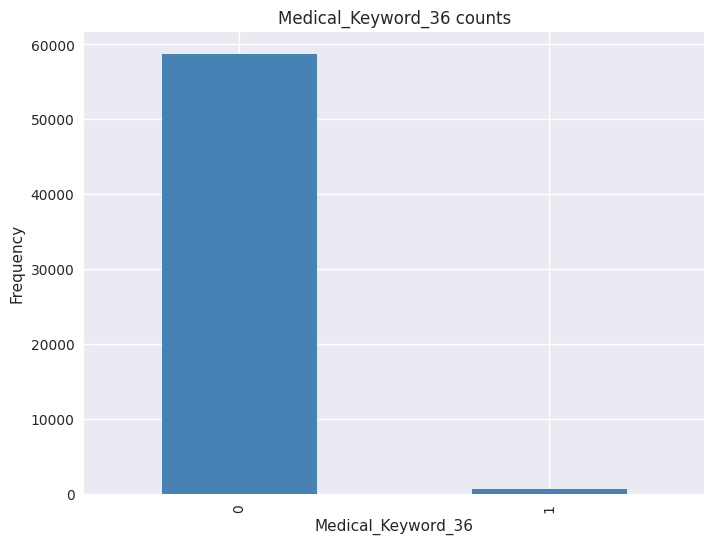

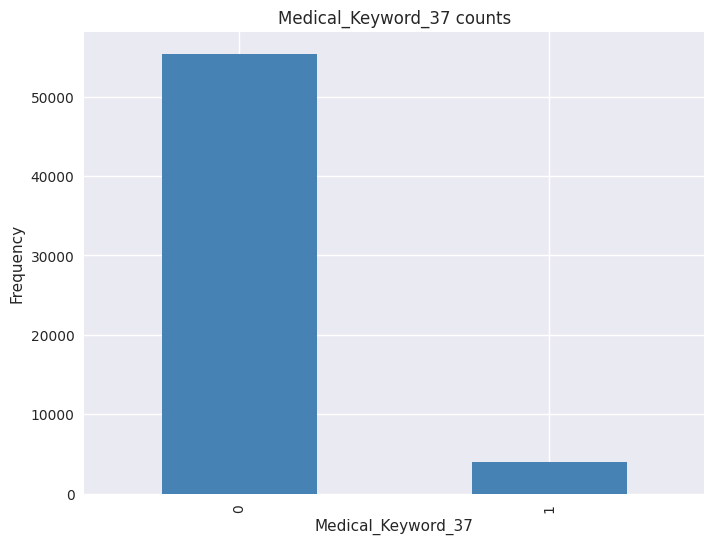

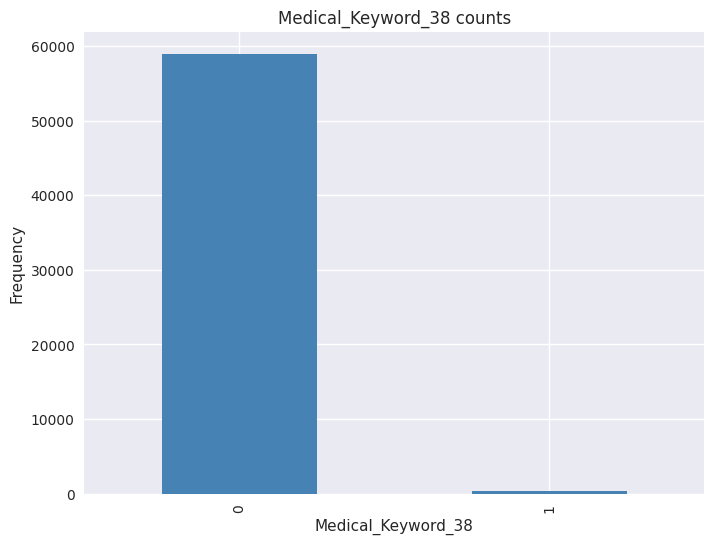

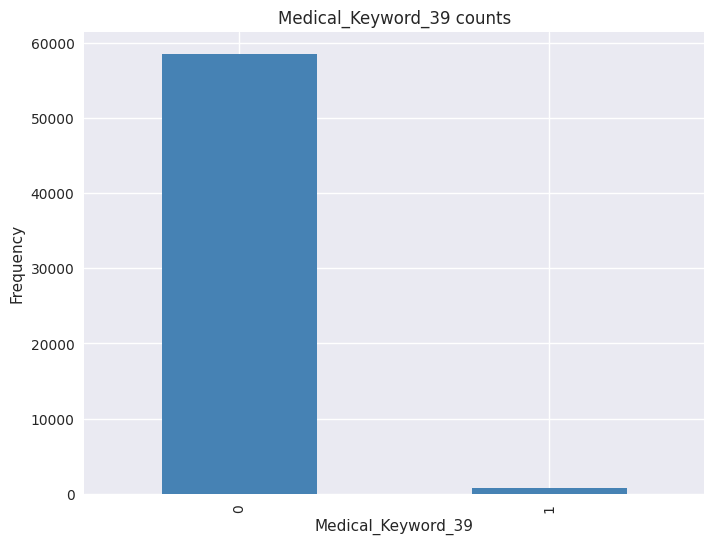

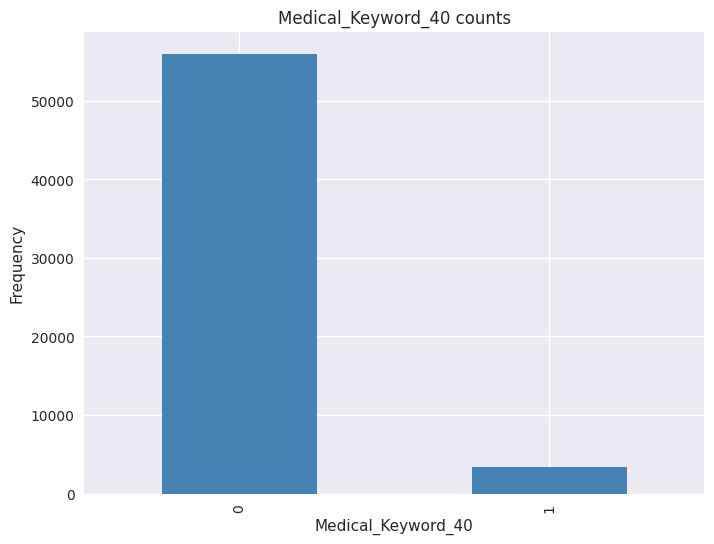

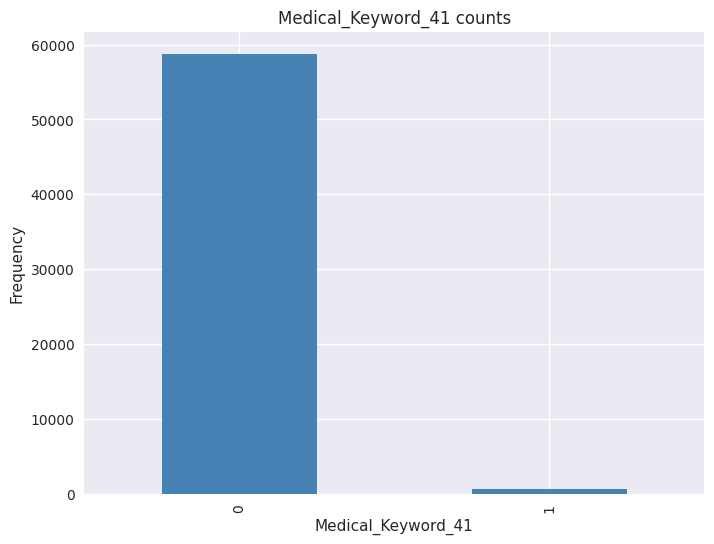

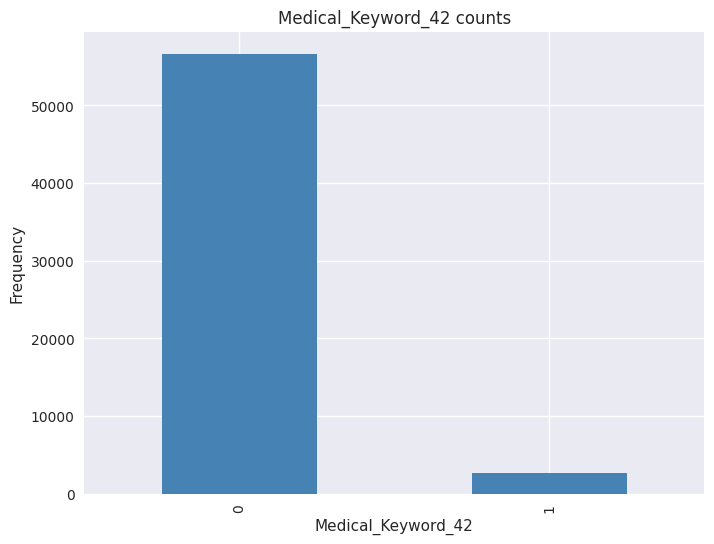

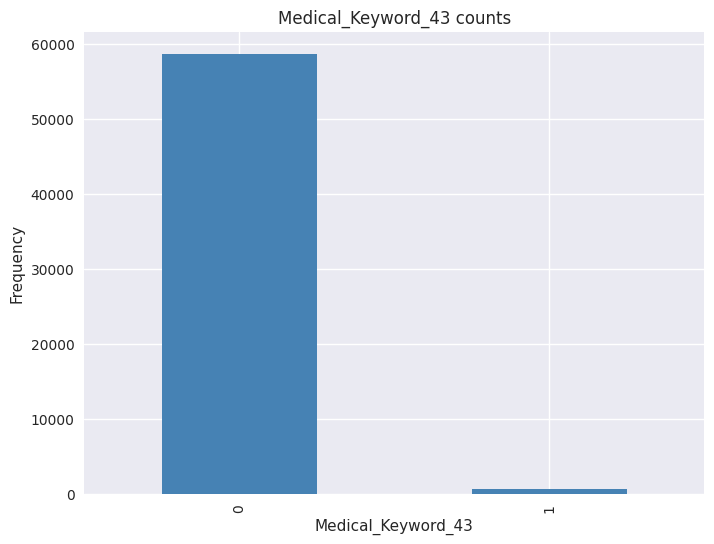

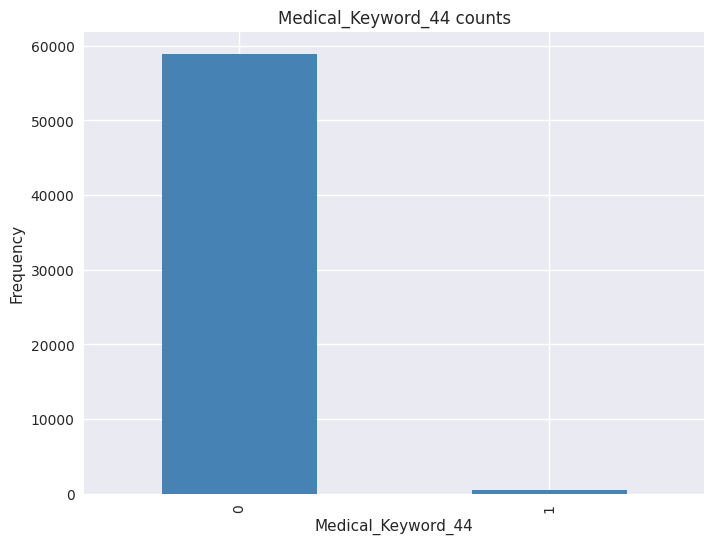

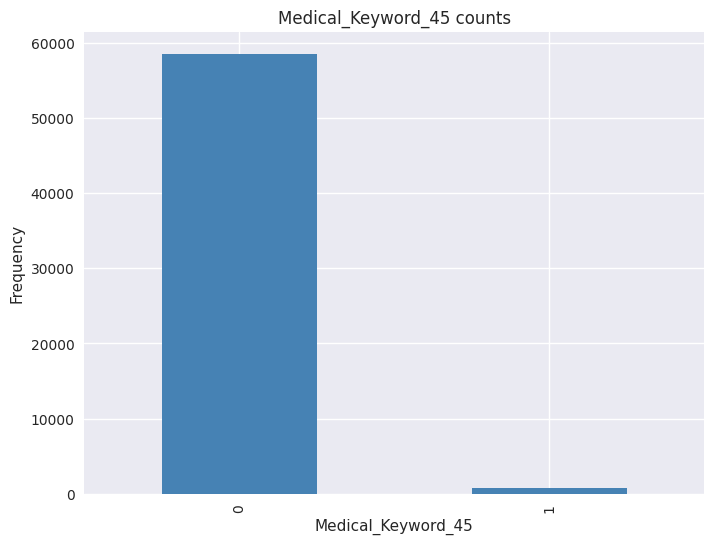

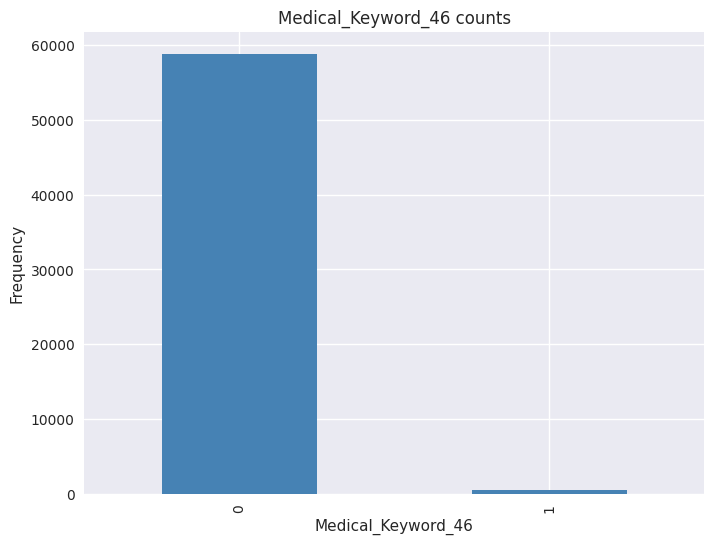

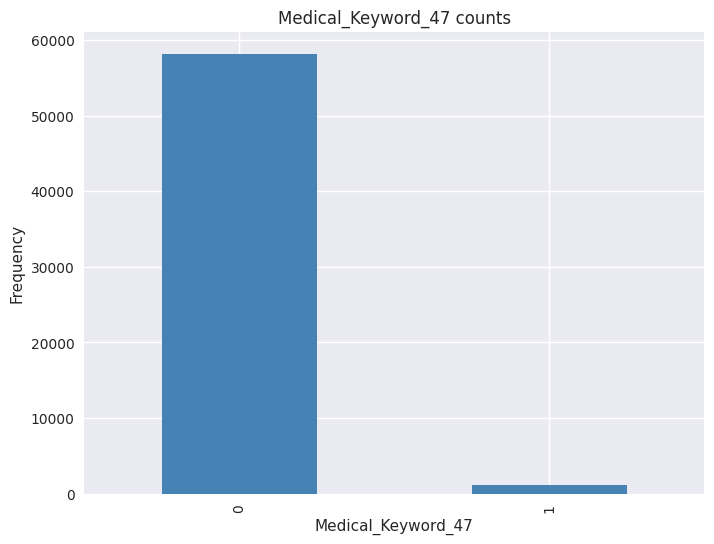

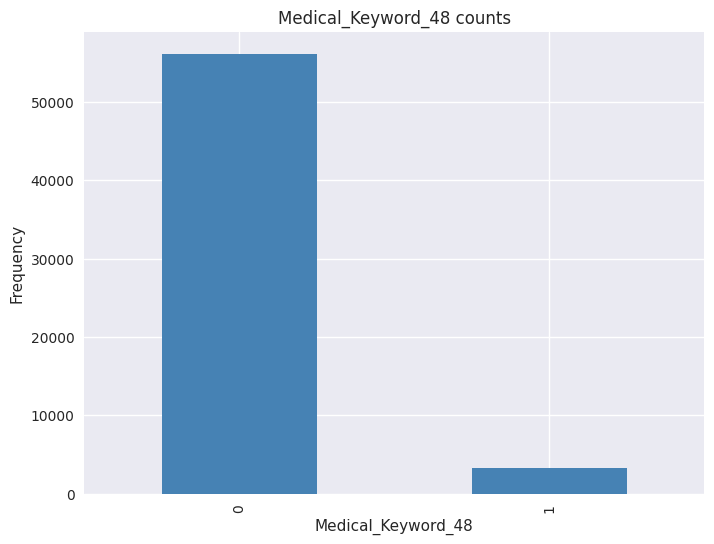

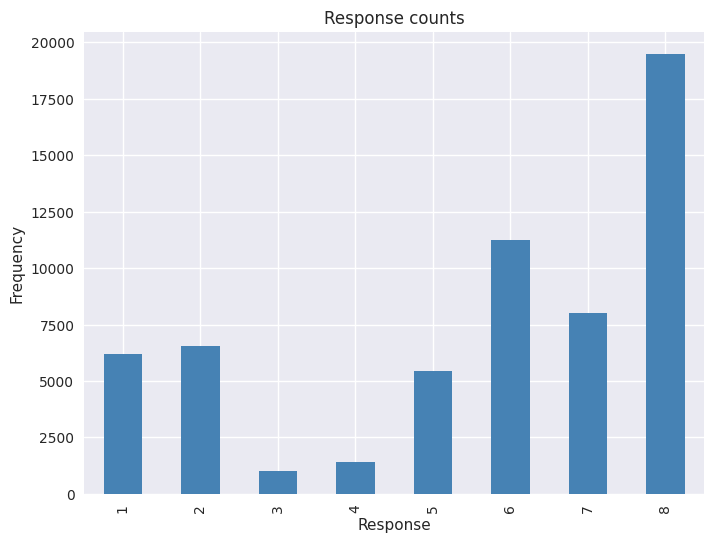

In [ ]:
for col in numerical_cols:
    counts = df_train[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize=(10, 6))
    elif len(counts) > 50 :
      continue
    else:
      fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

**Các cột thuộc tính đặc trưng cũng đều bị vấn đề mất cân bằng giá trị.**


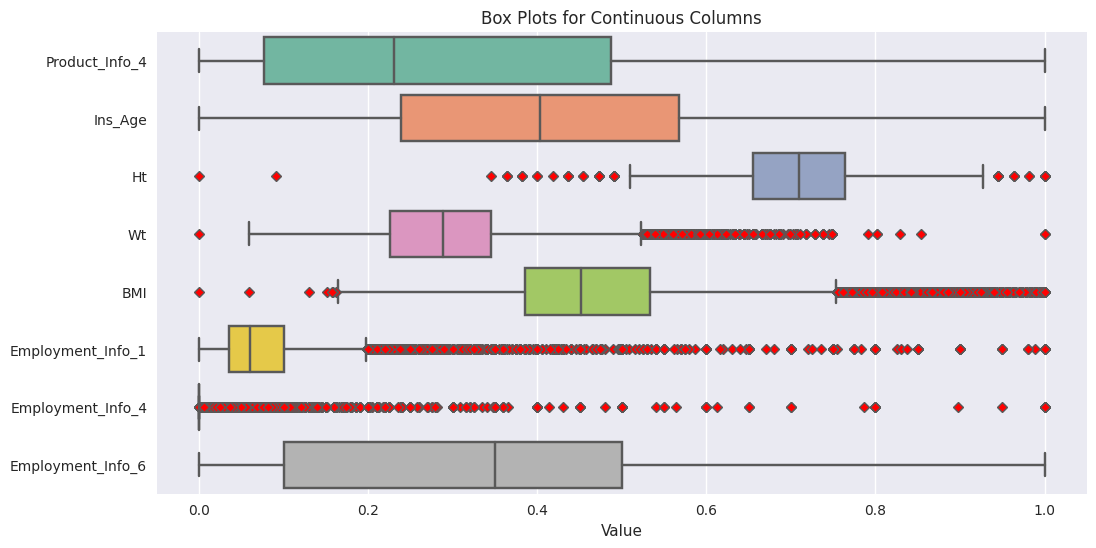

In [ ]:
continuous = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
              'Employment_Info_4', 'Employment_Info_6']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train[continuous], orient="h", palette="Set2",
            flierprops=dict(markerfacecolor = 'red', marker='D'))
plt.title("Box Plots for Continuous Columns")
plt.xlabel("Value")
plt.show()


In [ ]:
categorical_cols =  [col for col in df_train.columns if df_train[col].dtype =='object']
print("Dữ liệu định tính:", categorical_cols)

Dữ liệu định tính: ['Product_Info_2']


In [ ]:
for col in categorical_cols:
  df_train[col] = pd.factorize(df_train[col])[0]

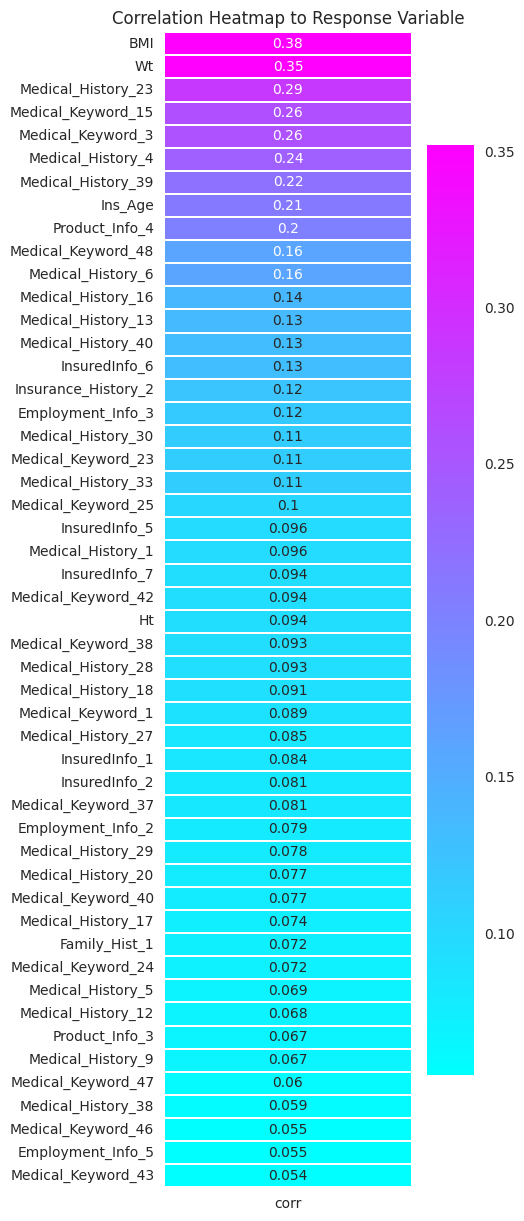

In [ ]:
#Ma trận tương quan của các biến với Response
variables = df_train[[i for i in df_train.columns if i not in ('Id', 'Response')]]
target = df_train['Response']

# Giá trị tuyệt đối của hệ số tương quan.
corr_matrix = abs(variables.corrwith(target, method='pearson')).sort_values(ascending=False)
correlation_matrix = pd.DataFrame({'corr':corr_matrix})
top_50_corr = correlation_matrix[0:50]

# Tạo bản đồ nhiệt của ma trận tương quan tuyệt đối 50 biến hàng đầu.
plt.figure(figsize=(4, 15))
sns.heatmap(data = top_50_corr, robust= True, annot=True, fmt= '.2g',
                cmap='cool', linewidths=0.01, linecolor= 'white')
plt.title("Correlation Heatmap to Response Variable")
plt.show()

In [ ]:
correlation_matrix[correlation_matrix['corr'] > 0.09].index

Index(['BMI', 'Wt', 'Medical_History_23', 'Medical_Keyword_15',
       'Medical_Keyword_3', 'Medical_History_4', 'Medical_History_39',
       'Ins_Age', 'Product_Info_4', 'Medical_Keyword_48', 'Medical_History_6',
       'Medical_History_16', 'Medical_History_13', 'Medical_History_40',
       'InsuredInfo_6', 'Insurance_History_2', 'Employment_Info_3',
       'Medical_History_30', 'Medical_Keyword_23', 'Medical_History_33',
       'Medical_Keyword_25', 'InsuredInfo_5', 'Medical_History_1',
       'InsuredInfo_7', 'Medical_Keyword_42', 'Ht', 'Medical_Keyword_38',
       'Medical_History_28', 'Medical_History_18'],
      dtype='object')

In [ ]:
df_train_new = df_train[['BMI', 'Wt', 'Medical_History_23', 'Medical_Keyword_15',
       'Medical_Keyword_3', 'Medical_History_4', 'Medical_History_39',
       'Ins_Age', 'Product_Info_4', 'Medical_Keyword_48', 'Medical_History_6',
       'Medical_History_16', 'Medical_History_13', 'Medical_History_40',
       'InsuredInfo_6', 'Insurance_History_2', 'Employment_Info_3',
       'Medical_History_30', 'Medical_Keyword_23', 'Medical_History_33',
       'Medical_Keyword_25', 'InsuredInfo_5', 'InsuredInfo_7',
       'Medical_Keyword_42', 'Ht', 'Medical_Keyword_38', 'Medical_History_28',
       'Medical_History_18', 'Response']]
df_train_new

,BMI,Wt,Medical_History_23,Medical_Keyword_15,Medical_Keyword_3,Medical_History_4,Medical_History_39,Ins_Age,Product_Info_4,Medical_Keyword_48,...,Medical_History_33,Medical_Keyword_25,InsuredInfo_5,InsuredInfo_7,Medical_Keyword_42,Ht,Medical_Keyword_38,Medical_History_28,Medical_History_18,Response
0,0.323008,0.148536,3,0,0,1,3,0.641791,0.076923,0,...,1,0,1,1,0,0.581818,0,1,1,8
1,0.272288,0.131799,3,0,0,1,3,0.059701,0.076923,0,...,3,0,1,1,0,0.600000,0,1,1,4
2,0.428780,0.288703,3,0,0,2,3,0.029851,0.076923,0,...,3,0,1,1,0,0.745455,0,1,1,8
3,0.352438,0.205021,3,0,0,2,3,0.164179,0.487179,0,...,3,0,1,1,0,0.672727,0,1,1,8
4,0.424046,0.234310,3,0,0,2,3,0.417910,0.230769,0,...,3,0,1,1,0,0.654545,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,0.519103,0.320084,3,0,0,1,3,0.074627,0.230769,0,...,3,0,1,1,0,0.709091,0,1,1,4
59377,0.551119,0.403766,3,0,0,2,3,0.432836,0.230769,0,...,3,0,1,1,0,0.800000,0,1,1,7
59378,0.360969,0.246862,3,0,0,2,3,0.104478,0.076923,0,...,3,0,1,1,0,0.745455,0,1,1,8
59379,0.462452,0.276151,3,0,0,1,3,0.507463,0.230769,0,...,1,0,1,1,0,0.690909,0,1,1,8


In [ ]:
df_train_new['Response'].value_counts()

Response
8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: count, dtype: int64

# **Tiền xử lý dữ liệu - Test Dataset**

In [ ]:
df_test = pd.read_csv('/kaggle/input/prudential-life-insurance-assessment/test.csv.zip')
# df_test = pd.read_csv('./test.csv')
df_test

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,79093,1,D3,26,0.128205,2,3,1,0.537313,0.636364,...,0,0,0,0,0,0,0,0,0,0
19761,79099,1,D4,10,0.230769,2,3,1,0.134328,0.618182,...,0,0,0,0,0,0,0,0,0,0
19762,79102,1,A2,26,0.076923,2,3,1,0.850746,0.727273,...,0,0,0,0,0,0,0,0,0,0
19763,79125,1,D1,26,0.487179,2,3,1,0.522388,0.745455,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=127)

In [ ]:
check_nan = df_test.isna().sum()
check_nan[check_nan > 0]

Employment_Info_1          3
Employment_Info_4       2137
Employment_Info_6       3787
Insurance_History_5     8105
Family_Hist_2           9880
Family_Hist_3          11064
Family_Hist_4           6677
Family_Hist_5          13624
Medical_History_1       2972
Medical_History_10     19564
Medical_History_15     14864
Medical_History_24     18585
Medical_History_32     19414
dtype: int64

In [ ]:
total_miss = df_test.isna().sum().sort_values(ascending = False)
percent = ((df_test.isna().sum()/df_test.shape[0])*100).sort_values(ascending = False)

total_miss = total_miss[total_miss > 0]
percent = percent[percent > 0]

missing_data = pd.concat([total_miss, percent], axis = 1, keys = ['Total Miss', 'Percent'])
missing_data.reset_index(inplace=True)
missing_data.rename(columns={'index': 'Columns'}, inplace=True)
missing_data

,Columns,Total Miss,Percent
0,Medical_History_10,19564,98.983051
1,Medical_History_32,19414,98.224134
2,Medical_History_24,18585,94.029851
3,Medical_History_15,14864,75.203643
4,Family_Hist_5,13624,68.929927
5,Family_Hist_3,11064,55.977738
6,Family_Hist_2,9880,49.987351
7,Insurance_History_5,8105,41.006830
8,Family_Hist_4,6677,33.781938
9,Employment_Info_6,3787,19.160132


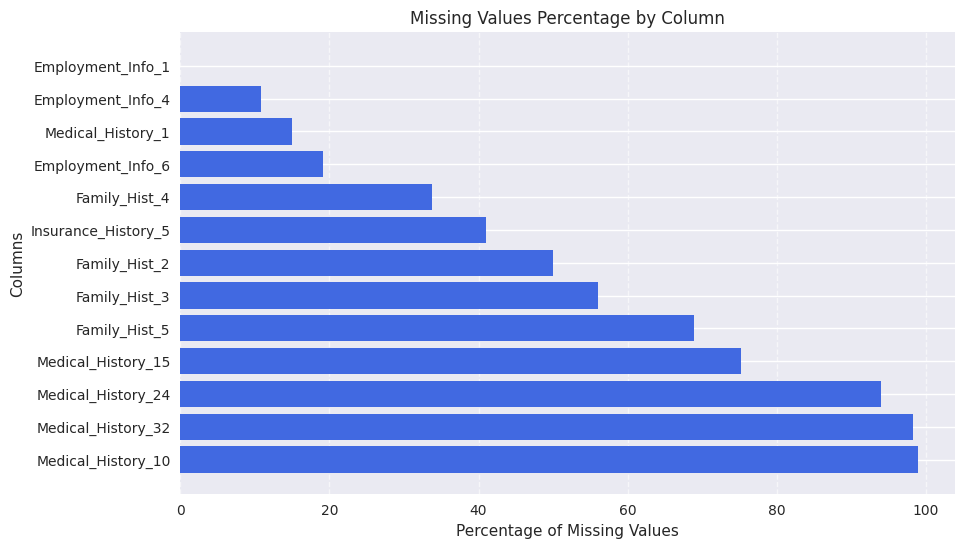

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(missing_data['Columns'], missing_data['Percent'], color='royalblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values Percentage by Column')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Lọc những cột có tỷ lệ Null trên 30%
nacols_above30 = missing_data[missing_data['Percent'] > 30]['Columns']
nacols_above30

0     Medical_History_10
1     Medical_History_32
2     Medical_History_24
3     Medical_History_15
4          Family_Hist_5
5          Family_Hist_3
6          Family_Hist_2
7    Insurance_History_5
8          Family_Hist_4
Name: Columns, dtype: object

In [ ]:
df_test = df_test.drop(columns = nacols_above30, axis = 1)
df_test.shape

(19765, 118)

In [ ]:
check_nan = df_test.isna().sum()
check_nan[check_nan > 0]

Employment_Info_1       3
Employment_Info_4    2137
Employment_Info_6    3787
Medical_History_1    2972
dtype: int64

In [ ]:
columns_to_fill = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Medical_History_1']
df_test[columns_to_fill] = df_test[columns_to_fill].fillna(df_test[columns_to_fill].mean())

In [ ]:
check_nan = df_test.isna().sum()
check_nan[check_nan > 0]

Series([], dtype: int64)

In [ ]:
test_duplicated = df_test.duplicated().sum()
test_duplicated

0

In [ ]:
df_test_new = df_test[['BMI', 'Wt', 'Medical_History_23', 'Medical_Keyword_15',
       'Medical_Keyword_3', 'Medical_History_4', 'Medical_History_39',
       'Ins_Age', 'Product_Info_4', 'Medical_Keyword_48', 'Medical_History_6',
       'Medical_History_16', 'Medical_History_13', 'Medical_History_40',
       'InsuredInfo_6', 'Insurance_History_2', 'Employment_Info_3',
       'Medical_History_30', 'Medical_Keyword_23', 'Medical_History_33',
       'Medical_Keyword_25', 'InsuredInfo_5', 'InsuredInfo_7',
       'Medical_Keyword_42', 'Ht', 'Medical_Keyword_38', 'Medical_History_28',
       'Medical_History_18']]
df_test_new

,BMI,Wt,Medical_History_23,Medical_Keyword_15,Medical_Keyword_3,Medical_History_4,Medical_History_39,Ins_Age,Product_Info_4,Medical_Keyword_48,...,Medical_Keyword_23,Medical_History_33,Medical_Keyword_25,InsuredInfo_5,InsuredInfo_7,Medical_Keyword_42,Ht,Medical_Keyword_38,Medical_History_28,Medical_History_18
0,0.472262,0.338912,1,1,0,2,3,0.611940,0.487179,0,...,0,3,1,1,1,0,0.781818,0,1,1
1,0.484984,0.311715,3,0,0,1,3,0.626866,0.076923,0,...,0,3,0,1,1,0,0.727273,0,1,1
2,0.519103,0.320084,3,0,0,1,3,0.582090,0.144667,0,...,1,1,1,1,1,0,0.709091,0,1,1
3,0.486962,0.267782,3,0,0,2,3,0.522388,0.151709,1,...,0,3,0,1,1,0,0.654545,0,2,1
4,0.428718,0.246862,1,0,0,1,3,0.298507,0.076923,0,...,0,3,1,1,1,0,0.672727,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,0.284929,0.152720,3,0,0,2,3,0.537313,0.128205,0,...,0,3,0,1,1,0,0.636364,0,1,1
19761,0.446361,0.225941,3,0,0,2,3,0.134328,0.230769,0,...,0,3,0,1,1,0,0.618182,0,1,1
19762,0.655973,0.414226,1,1,0,1,3,0.850746,0.076923,0,...,0,3,0,1,1,0,0.727273,0,1,1
19763,0.818698,0.529289,3,0,0,2,3,0.522388,0.487179,0,...,0,3,0,1,1,0,0.745455,0,1,1


# **Build Model**

In [ ]:
X = df_train_new.drop(['Response'], axis = 1)
y = df_train_new['Response']

<Axes: ylabel='count'>

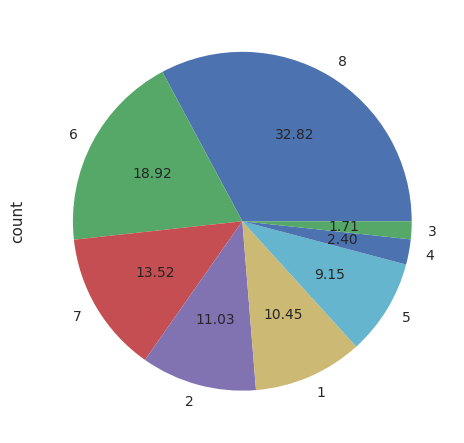

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')

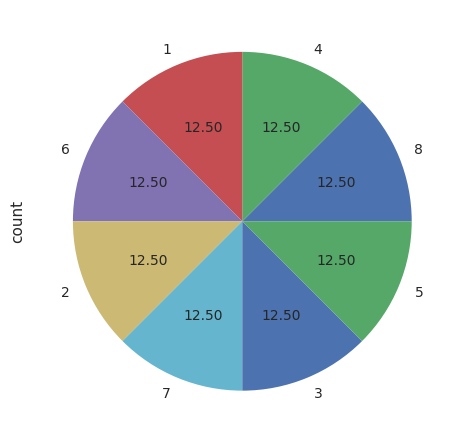

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct = '%.2f')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, shuffle = True, random_state = 42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 42)

In [ ]:
# Chuẩn hoá dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(109138, 28) (109138,)
(46774, 28) (46774,)


### **Random Forest Classifier Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelRf = RandomForestClassifier()

In [ ]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

In [ ]:
grid_search = GridSearchCV(estimator = modelRf, param_grid = rf_params, n_jobs = -1, cv = 5, scoring = 'accuracy')
grid_result = grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Lấy kết quả của cross-validation
cv_results = grid_result.cv_results_

combined_info = list(zip(cv_results['params'], cv_results['mean_test_score']))
sorted_info = sorted(combined_info, key=lambda x: x[1], reverse=True)

print("Parameters and Evaluation Scores:")
for params, score in sorted_info:
    print(f"Parameters: {params}, Score: {score}")

Parameters and Evaluation Scores:
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}, Score: 0.854239558883495
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}, Score: 0.8541112925093515
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}, Score: 0.8540288182835859
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}, Score: 0.8537447714585765
Parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}, Score: 0.8534332525348702
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}, Score: 0.853286638405549
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}, Score: 0.8530850704238879
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_

In [ ]:
print(grid_result.best_params_) # In ra bộ tham số tốt nhất
print(grid_result.best_score_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
0.854239558883495


In [ ]:
modelRandForest = modelRf.set_params(**grid_result.best_params_)
modelRandForest.fit(X_train, y_train)
y_pred = modelRandForest.predict(X_test)

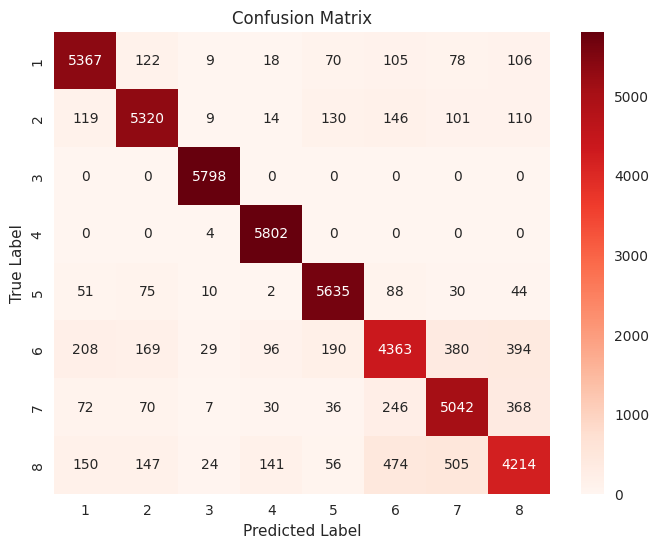

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels = modelRandForest.classes_, yticklabels = modelRandForest.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.91      0.91      5875
           2       0.90      0.89      0.90      5949
           3       0.98      1.00      0.99      5798
           4       0.95      1.00      0.97      5806
           5       0.92      0.95      0.94      5935
           6       0.80      0.75      0.78      5829
           7       0.82      0.86      0.84      5871
           8       0.80      0.74      0.77      5711

    accuracy                           0.89     46774
   macro avg       0.89      0.89      0.89     46774
weighted avg       0.89      0.89      0.89     46774



### **Multilayer Perceptron (MLP)**

In [ ]:
# from sklearn.neural_network import MLPClassifier

In [ ]:
# mlp_model = MLPClassifier(max_iter = 5000)

In [ ]:
# mlp_params = {
#     'hidden_layer_sizes': [(20,), (50,), (100,)],
#     'activation': ['relu'],
#     'solver': ['adam'],
#     'alpha': [0.0001, 0.001],
#     'learning_rate': ['constant', 'adaptive']
# }

In [ ]:
# grid_search = GridSearchCV(estimator = mlp_model, param_grid = mlp_params, n_jobs = -1, cv = 5, scoring = 'accuracy')
# grid_result = grid_search.fit(X_train, y_train)

In [ ]:
# # Lấy kết quả của cross-validation
# cv_results = grid_result.cv_results_

# combined_info = list(zip(cv_results['params'], cv_results['mean_test_score']))
# sorted_info = sorted(combined_info, key=lambda x: x[1], reverse=True)

# print("Parameters and Evaluation Scores:")
# for params, score in sorted_info:
#     print(f"Parameters: {params}, Score: {score}")

In [ ]:
# print(grid_result.best_params_) # In ra bộ tham số tốt nhất
# print(grid_result.best_score_)

In [ ]:
# modelMLP = mlp_model.set_params(**grid_result.best_params_)
# modelMLP.fit(X_train, y_train)
# y_pred = modelMLP.predict(X_test)

In [ ]:
# conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize = (8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels = modelMLP.classes_, yticklabels = modelMLP.classes_)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

In [ ]:
# print(classification_report(y_test, y_pred))

### **K-Nearest Neighbors**

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# k_fold = StratifiedKFold()

In [ ]:
# modelKNN = KNeighborsClassifier()

In [ ]:
# knn_params = {
#     "n_neighbors": range(3, 30, 3),
#     "weights": ['uniform', 'distance'],
#     "metric": ['euclidean'],
#     "algorithm": ['kd_tree', 'ball_tree']
# }

In [ ]:
# grid_search = GridSearchCV(estimator = modelKNN, param_grid = knn_params, n_jobs = -1, cv = k_fold, scoring = 'accuracy')
# grid_result = grid_search.fit(X_train, y_train)

In [ ]:
# # Lấy kết quả của cross-validation
# cv_results = grid_result.cv_results_

# combined_info = list(zip(cv_results['params'], cv_results['mean_test_score']))
# sorted_info = sorted(combined_info, key = lambda x: x[1], reverse=True)

# print("Parameters and Evaluation Scores:")
# for params, score in sorted_info:
#     print(f"Parameters: {params}, Score: {score}")

In [ ]:
# print(grid_result.best_params_)
# print(grid_result.best_score_)

In [ ]:
# final_model = modelKNN.set_params(**grid_result.best_params_)
# final_model.fit(X_train, y_train)
# y_pred = final_model.predict(X_test)

In [ ]:
X_train = df_train_new.drop(['Response'], axis = 1)
y_train = df_train_new['Response']
X_test = df_test_new

**Đánh giá mô hình Random Forest trên tập Test**

In [ ]:
modelRandForest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=200)

In [ ]:
y_pred = modelRandForest.predict(X_test)

In [ ]:
y_pred

array([7, 8, 6, ..., 1, 2, 6])

In [ ]:
y_pred.shape

(19765,)

In [ ]:
# file_name = 'Rf_predictions.txt'

# # Mở file TXT để ghi
# with open(file_name, 'w') as file:
#     # Ghi kết quả dự đoán vào file
#     for pred in y_pred:
#         file.write(str(pred) + '\n')

**Đánh giá mô hình MLP trên tập Test**

In [ ]:
# modelMLP.fit(X_train, y_train)

In [ ]:
# y_pred = modelMLP.predict(X_test)

In [ ]:
# y_pred

In [ ]:
# y_pred.shape